In [25]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib
from matplotlib.lines import Line2D
from PIL import Image
import seaborn as sns

%matplotlib inline


In [26]:
_METRICS_FILE = './files/benchmark_sensitivityAnalysis2'
_METRIC = 'accuracy'

## Read file with metrics

In [27]:
try:
    #read csv file
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except OSError as err:
    # if there is no csv file we read the excel file
    excel_file = pd.read_excel(_METRICS_FILE+'.xlsx')
    # transform the excel file in a csv file
    excel_file.to_csv(_METRICS_FILE+'.csv', index=False)
    # read the new csv file 
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except:
    print("ERROR WHILE READING METRICS FILE")


In [28]:
datasets_to_remove = ['bankmarketingnorm', 'airlinesnorm']
classifiers_to_remove = metrics.classifier[metrics.classifier.str.startswith('keras_') & (metrics.classifier != 'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90')]#['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv']
metrics = metrics[~metrics.classifier.isin(classifiers_to_remove)]
metrics = metrics[~metrics.dataset.isin(datasets_to_remove)]
metrics = metrics[metrics.instances>750]

In [29]:
metrics.sample(5)

,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time
9607,spambase,MOA_OzaBagAdwin,4601,57,2,0.986469,0.941964,0.000956,0.000254,0.001210,0.440705,0.117244,0.557949
246,CBF,MOA_OzaBoostAdwin,930,128,3,0.950288,0.921875,0.005394,0.002010,0.007404,0.501682,0.186913,0.688595
8711,Wafer,MOA_OzaBoostAdwin,7164,152,2,0.994830,0.959682,0.005009,0.000893,0.005902,3.591409,0.640046,4.231454
7614,Symbols,MOA_ActiveClassifier,1020,398,6,0.793687,0.761276,0.000130,0.001196,0.001326,0.013220,0.122035,0.135255
8100,TwoPatterns,MOA_ActiveClassifier,5000,128,4,0.446994,0.245094,0.000029,0.000242,0.000270,0.014302,0.120849,0.135151


## Useful variables

In [30]:
family_label = {'NN'  : 'Neural_Network',
                'FC'  : 'Function_Classifier',
                'BC'  : 'Bayesian_Classifier',
                'BL'  : 'Baseline_classifier',
                'DT'  : 'Decision_Trees',
                'MC'  : 'Meta_Classifier',
               }
classifier_family = {'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90':'NN', 
                   #'keras_parallel_3_Dilated_Conv':'NN',
                   #'keras_3_Dilated_Conv':'NN',
                   'sklearn_MLPClassifier':'NN',
                   'sklearn_Perceptron':'FC',
                   'sklearn_SGDClassifier':'FC',
                   'sklearn_BernoulliNB':'BC',
                   'sklearn_PassiveAggressiveClassifier':'FC',
                   'MOA_MajorityClass':'BL',
                   'MOA_RandomHoeffdingTree':'DT',
                   'MOA_NaiveBayes':'BC',
                   'MOA_SPegasos':'FC',
                   'MOA_OzaBagAdwin':'MC',
                   'MOA_OzaBoost':'MC',
                   'MOA_OzaBag':'MC',
                   'MOA_OCBoost':'MC',
                   'MOA_SingleClassifierDrift':'BC',
                   'MOA_WeightedMajorityAlgorithm':'MC',
                   'MOA_OzaBoostAdwin':'MC',
                   'MOA_Perceptron':'FC',
                   'MOA_HoeffdingAdaptiveTree':'DT',
                   'MOA_HoeffdingOptionTree':'DT',
                   'MOA_LeveragingBag':'MC',
                   'MOA_DecisionStump':'DT',
                   'MOA_OzaBagASHT':'MC',
                   'MOA_SGD':'FC',
                   'MOA_AdaHoeffdingOptionTree':'DT',
                   'MOA_ASHoeffdingTree':'DT',
                   'MOA_ActiveClassifier':'BC',
                   'MOA_HoeffdingTree':'DT',
                   'MOA_KUE': 'MC',
                   'MOA_AdaptiveRandomForest': 'DT'
                  }
#classifier_family = {'keras_3_Dilated_Conv':'NN',
#                   'keras_parallel_3_Dilated_Conv':'NN'
#                  }

family_classifier = {l:[k for k,v in classifier_family.items() if v == l] for l in family_label.keys()}
family_color = {'NN'  : 'k',
                'FC'  : 'b',
                'BC'  : 'g',
                'BL'  : 'y',
                'DT'  : 'r',
                'MC'  : 'm',
               }
line_style = ['-','--', '-.', ':', '>-','o--', 'x-.', '^:', 'o-','x--', '^-.', '>:', 'x-','^--', '>-.', 'o:', '^-','>--', 'o-.', 'x:']
classifier_to_compare = ['keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90']


In [31]:
datasets = metrics.dataset.unique()
classifiers = metrics['classifier'].unique()
print(len(datasets))
print(classifiers)

48
['MOA_ASHoeffdingTree' 'MOA_ActiveClassifier' 'MOA_AdaHoeffdingOptionTree'
 'MOA_AdaptiveRandomForest' 'MOA_DecisionStump'
 'MOA_HoeffdingAdaptiveTree' 'MOA_HoeffdingOptionTree' 'MOA_HoeffdingTree'
 'MOA_KUE' 'MOA_LeveragingBag' 'MOA_MajorityClass' 'MOA_NaiveBayes'
 'MOA_OCBoost' 'MOA_OzaBag' 'MOA_OzaBagASHT' 'MOA_OzaBagAdwin'
 'MOA_OzaBoost' 'MOA_OzaBoostAdwin' 'MOA_Perceptron'
 'MOA_RandomHoeffdingTree' 'MOA_SGD' 'MOA_SPegasos'
 'MOA_SingleClassifierDrift' 'MOA_WeightedMajorityAlgorithm'
 'sklearn_BernoulliNB' 'sklearn_MLPClassifier'
 'sklearn_PassiveAggressiveClassifier' 'sklearn_Perceptron'
 'sklearn_SGDClassifier'
 'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90']


In [32]:
directory = './files/'+_METRIC+'/'
pathlib.Path(directory).mkdir(parents=True, exist_ok=True)

## Estudio de los valores de _METRIC sin preprocesarlos

In [18]:
metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table = metrics_table.dropna()
metrics_table = metrics_table[list(classifier_family.keys())]
print(metrics_table.shape)

# Add mean row and save to file
metrics_table.loc['mean'] = metrics_table.mean()
metrics_table.to_csv(directory+'table_'+_METRIC+'.csv')
metrics_table = metrics_table.drop(index='mean')

metrics_table


(30, 30)


classifier,keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90,sklearn_MLPClassifier,sklearn_Perceptron,sklearn_SGDClassifier,sklearn_BernoulliNB,sklearn_PassiveAggressiveClassifier,MOA_MajorityClass,MOA_RandomHoeffdingTree,MOA_NaiveBayes,MOA_SPegasos,...,MOA_LeveragingBag,MOA_DecisionStump,MOA_OzaBagASHT,MOA_SGD,MOA_AdaHoeffdingOptionTree,MOA_ASHoeffdingTree,MOA_ActiveClassifier,MOA_HoeffdingTree,MOA_KUE,MOA_AdaptiveRandomForest
dataset,,,,,,,,,,,,,,,,,,,,,
ChlorineConcentration,0.970102,0.570868,0.468620,0.494261,0.534979,0.507174,0.556596,0.556587,0.474552,0.214425,...,0.578954,0.567663,0.556589,0.000000,0.556592,0.556592,0.385609,0.556592,0.580334,0.605209
CinCECGtorso,0.998249,0.987237,0.407691,0.432713,0.408888,0.425037,0.216454,0.943919,0.305983,0.243632,...,0.295849,0.286042,0.319742,0.000000,0.305206,0.305206,0.305062,0.305206,0.244001,0.948655
DistalPhalanxOutlineCorrect,0.811921,0.652687,0.646341,0.587387,0.705178,0.580257,0.616244,0.729952,0.747319,0.529781,...,0.742920,0.616244,0.744371,0.379363,0.747319,0.747319,0.711445,0.747319,0.379363,0.755890
ECG5000,0.943449,0.938727,0.904909,0.914359,0.817080,0.913939,0.592789,0.895727,0.863463,0.592789,...,0.863420,0.874179,0.863954,0.000000,0.863463,0.863463,0.858651,0.863463,0.889599,0.929352
ElectricDevices,0.820833,0.630053,0.332229,0.349994,0.554073,0.331187,0.260736,0.388315,0.562028,0.100338,...,0.577055,0.289054,0.568552,0.000000,0.562028,0.562028,0.553688,0.562028,0.589900,0.626875
FaceAll,0.980903,0.766827,0.673608,0.685324,0.680210,0.742152,0.151481,0.574528,0.854009,0.049066,...,0.871458,0.252694,0.829830,0.000000,0.774490,0.774490,0.639777,0.774490,0.455388,0.772229
FacesUCR,0.978714,0.763993,0.669768,0.684469,0.704066,0.748740,0.155223,0.473195,0.865498,0.039995,...,0.881364,0.258422,0.841318,0.000000,0.807631,0.807631,0.747450,0.807631,0.781168,0.703232
FiftyWords,0.696319,0.432049,0.284127,0.266134,0.534613,0.313552,0.120271,0.473207,0.571729,0.123646,...,0.566020,0.120271,0.537107,0.000000,0.570854,0.570854,0.270650,0.570854,0.124041,0.476617
HandOutlines,0.880725,0.842986,0.764025,0.764244,0.844920,0.765332,0.630293,0.795886,0.811071,0.495192,...,0.762989,0.744342,0.370042,0.368886,0.366850,0.811071,0.806402,0.811071,0.351062,0.883832


In [33]:
color = [family_color[classifier_family[classifier]] for classifier in classifier_family.keys()]
line = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifier_family.keys()]
style = [c+s for c,s in list(zip(color,line))]

### Plot _METRIC for each dataset

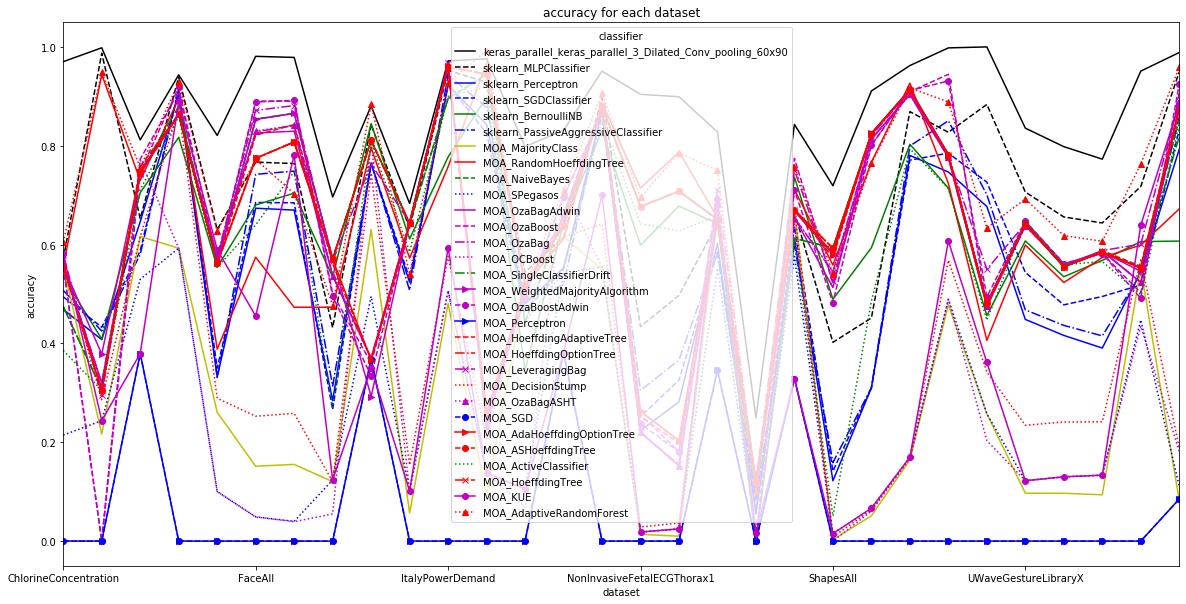

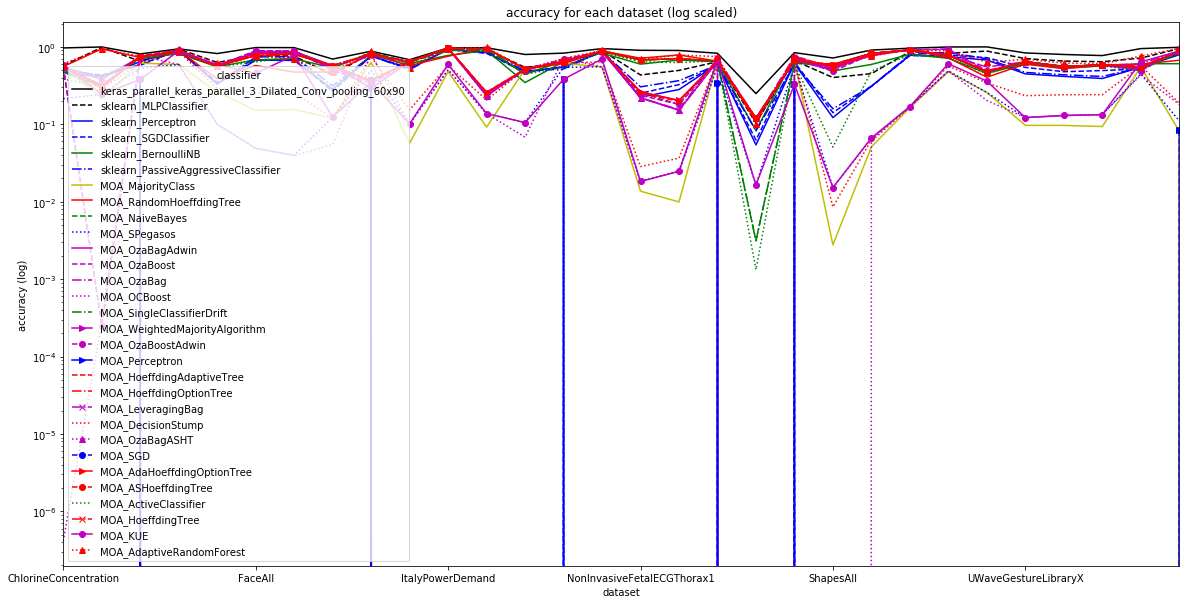

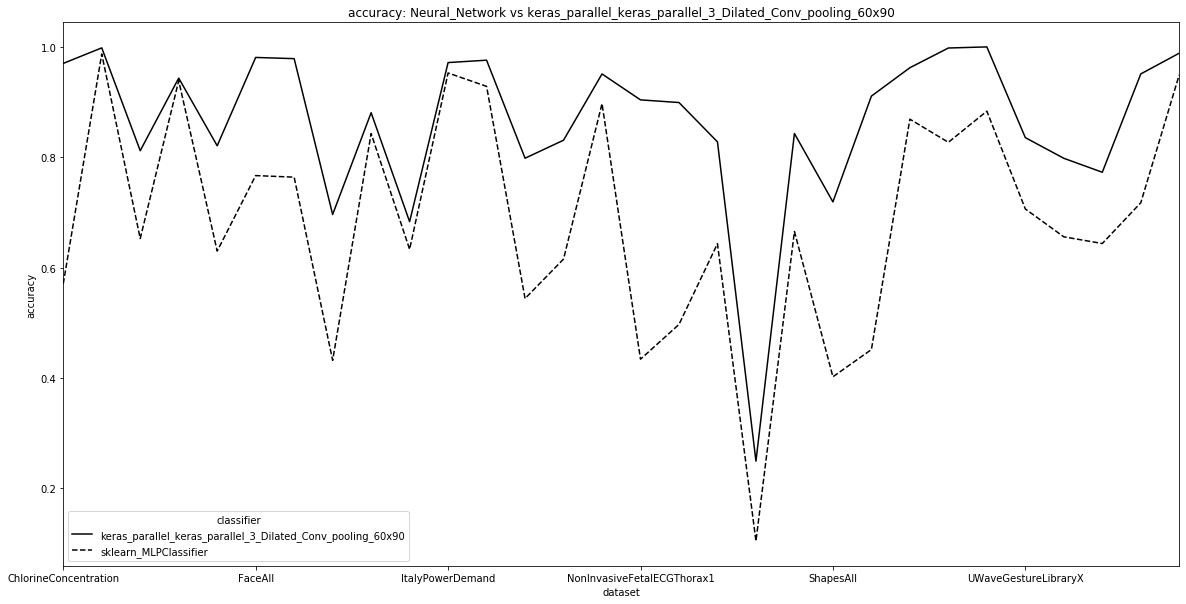

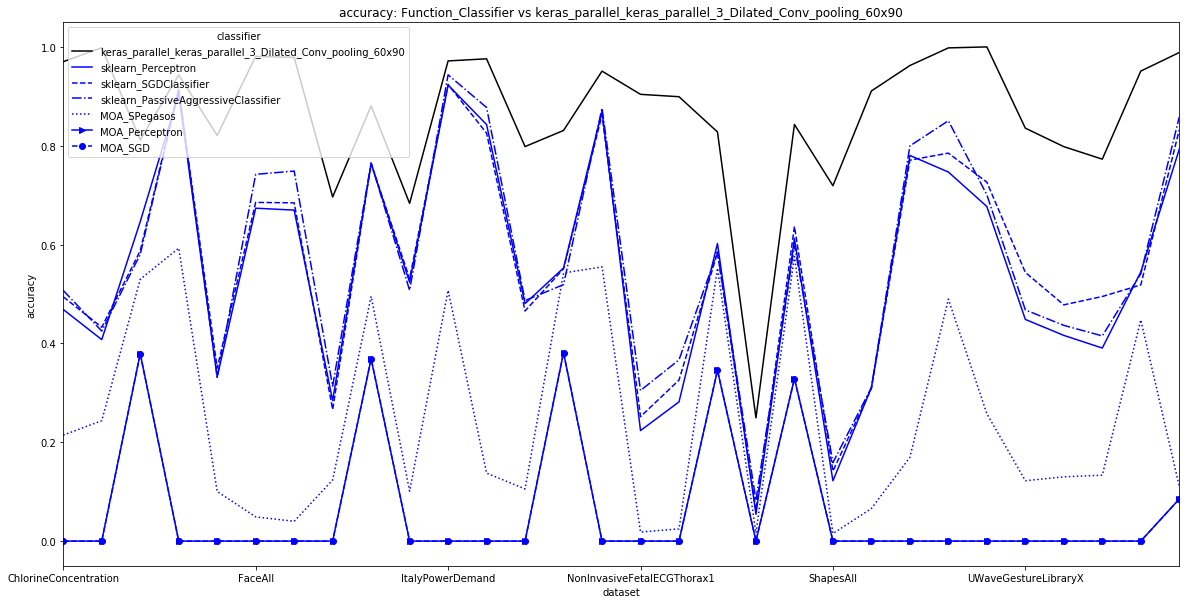

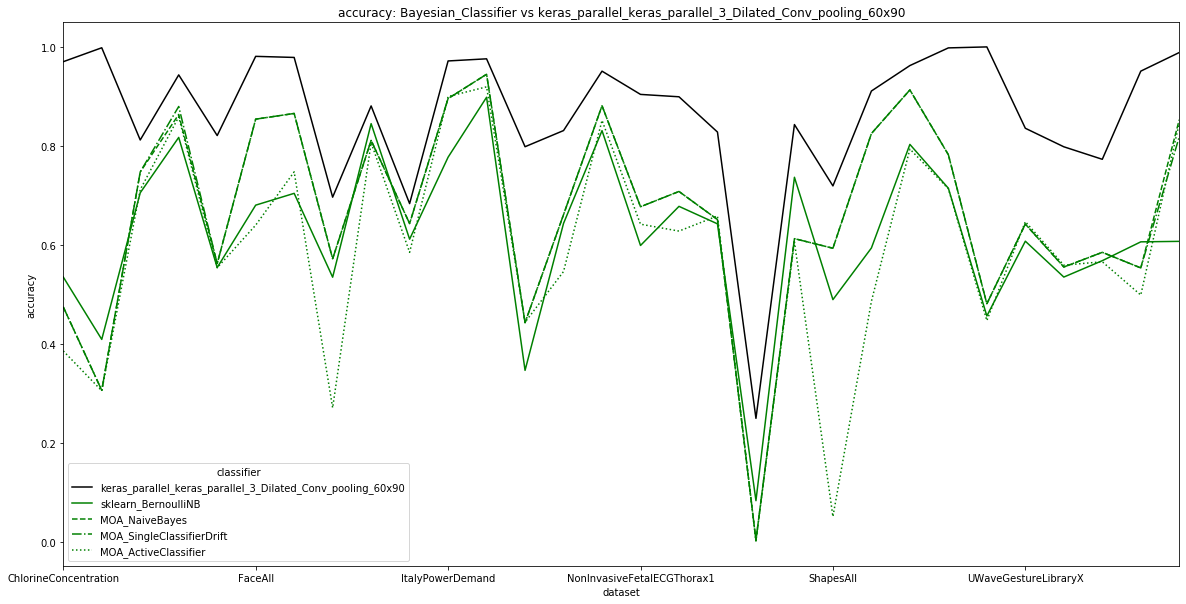

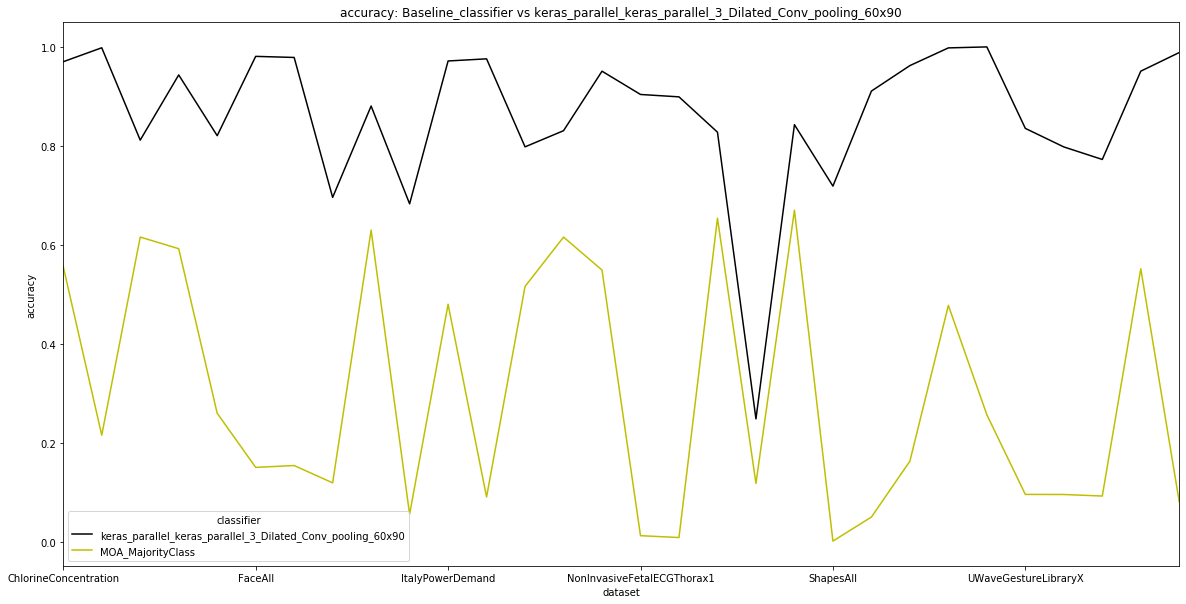

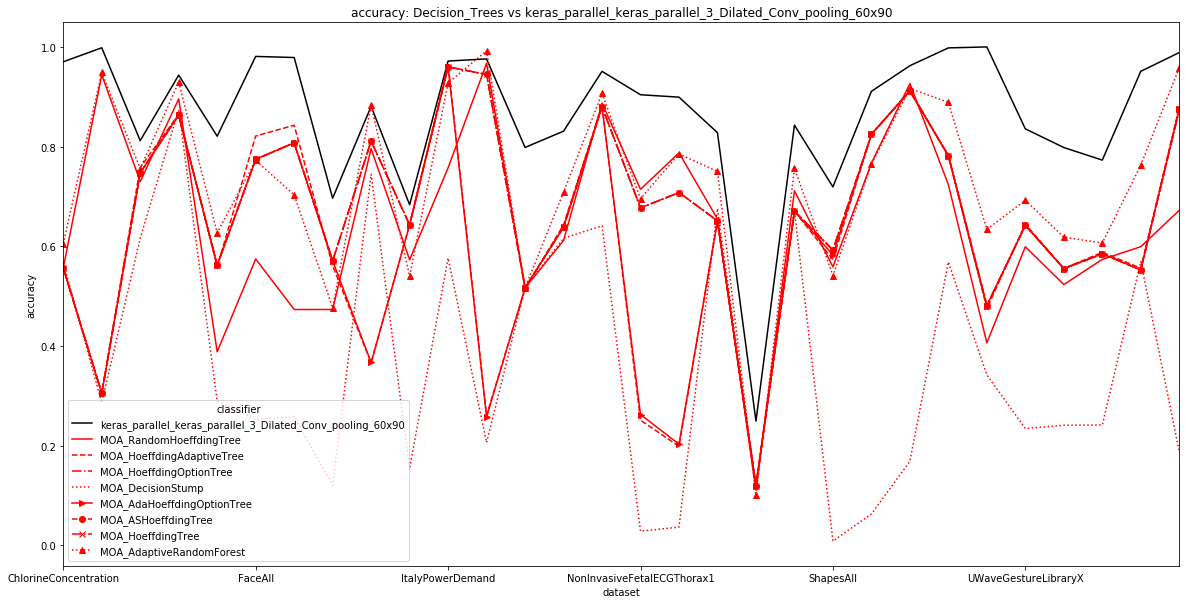

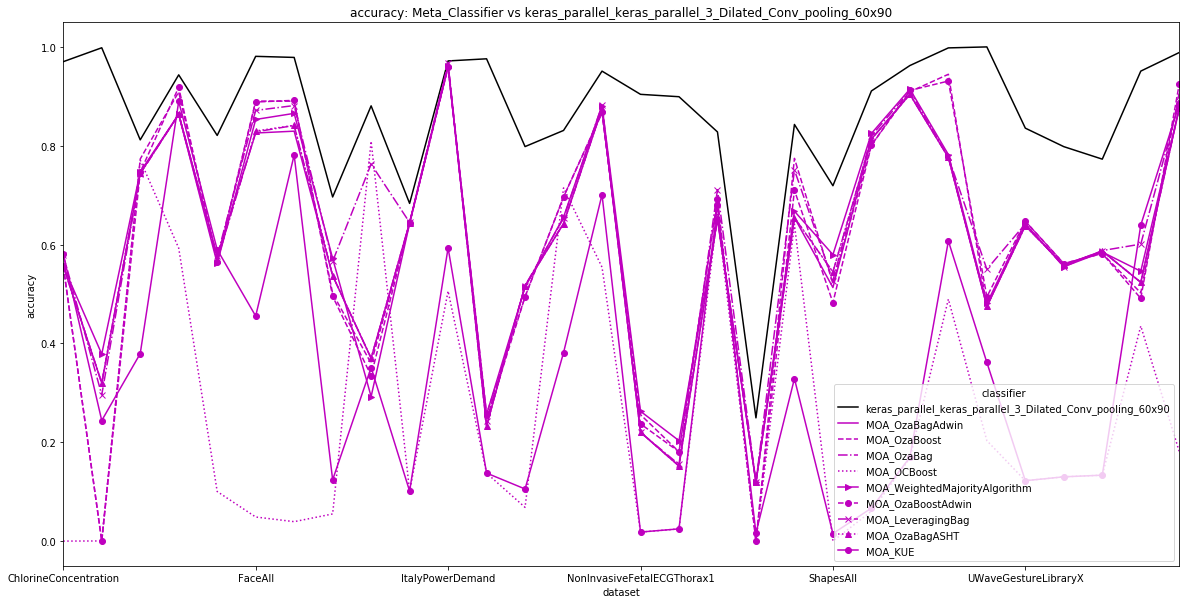

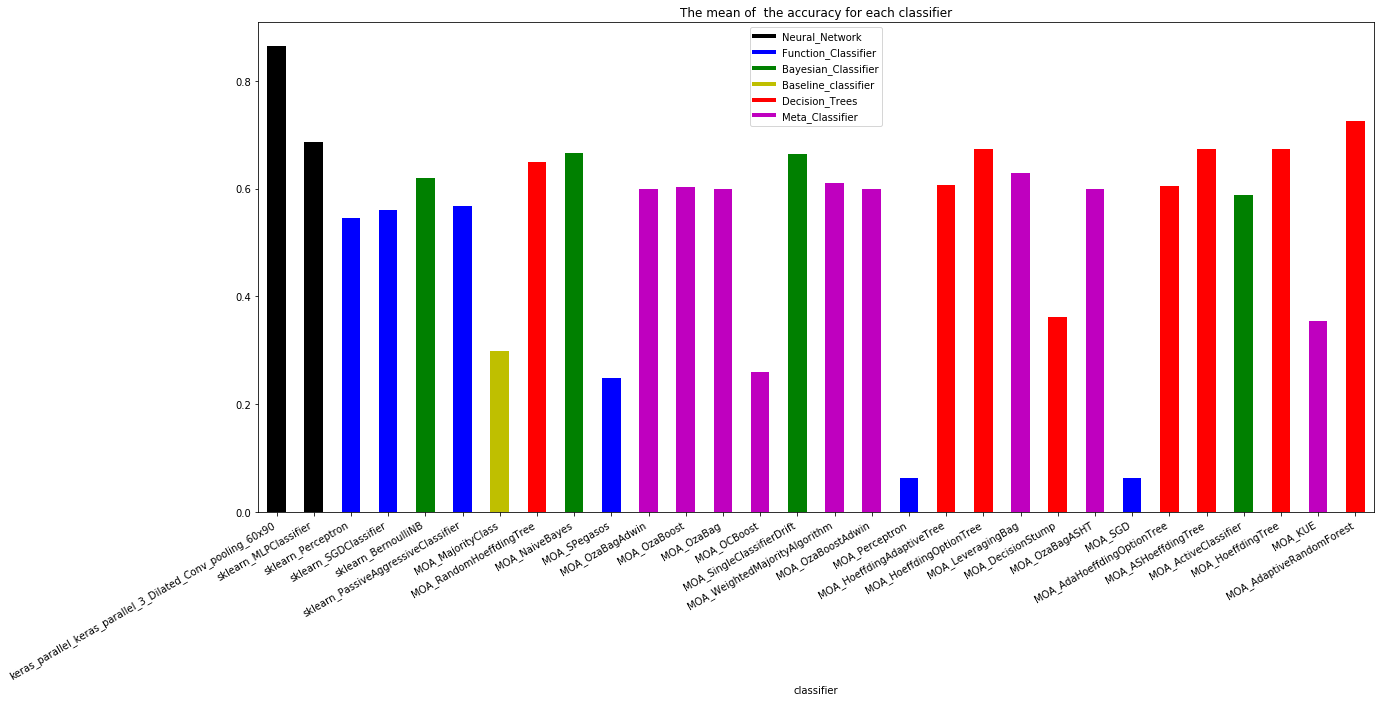

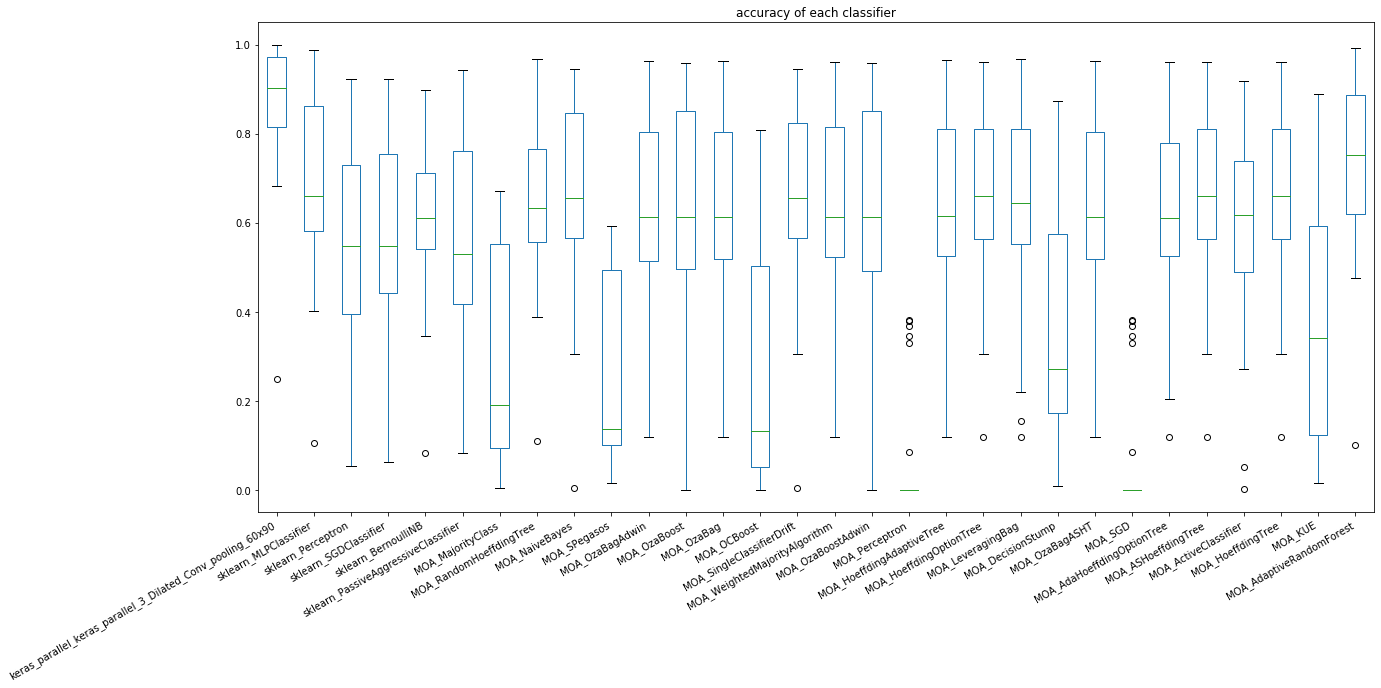

In [34]:
## Plot 
ax = metrics_table.plot(figsize=(20,10),   style=style, title= _METRIC+' for each dataset' )
ax.set_ylabel(_METRIC)
ax.get_figure().savefig(directory+'plot.png')
plt.show()

ax_log = metrics_table.plot(figsize=(20,10), logy=True,  style=style, title= _METRIC+' for each dataset (log scaled)' )
ax_log.set_ylabel(_METRIC+' (log)')
ax_log.get_figure().savefig(directory+'plot_log.png')
plt.show()

pdf_img_ls = [directory+'plot.png', directory+'plot_log.png' ]

for family in family_label.keys():
    classifiers_to_plot = [classifier for (classifier,f) in classifier_family.items() if f==family or classifier in classifier_to_compare]
    color_aux = [family_color[classifier_family[classifier]] for classifier in classifiers_to_plot]
    line_aux = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifiers_to_plot]
    style_aux = [c+s for c,s in list(zip(color_aux,line_aux))]
    metrics_table_aux = metrics_table[classifiers_to_plot]
    ax = metrics_table_aux.plot(figsize=(20,10), style=style_aux, title= _METRIC+': '+family_label[family]+' vs '+'&'.join(classifier_to_compare) )
    ax.set_ylabel(_METRIC)
    ax.get_figure().savefig(directory + 'plot_' + family +'.png')
    plt.show()
    pdf_img_ls.append(directory + 'plot_' + family +'.png')


## Bar plot (mean)
legend = [Line2D([0], [0], color=c, lw=4, label=family_label[f]) for f,c in family_color.items()]

ax = metrics_table.mean().plot.bar(figsize=(20,10), color=color, title= 'The mean of  the '+_METRIC+' for each classifier')
ax.legend(handles=legend)
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'mean.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'mean.png']
                           
#ax_log = metrics_table.mean().plot.bar(figsize=(20,10), color=color, logy=True, title= 'The mean of  the  '+_METRIC+' for each classifier (log scaled)')
#ax_log.legend(handles=legend)
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'mean_log.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'mean_log.png']

## Box Plot 
ax = metrics_table.plot.box(figsize=(20,10), title= _METRIC+' of each classifier')
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'box.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'box.png']
                           
#ax_log = metrics_table.plot.box(figsize=(20,10), logy=True, title= _METRIC+'  of each classifier (log scaled)')
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'box_log.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'box_log.png']

In [12]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = directory+_METRIC+'.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []

### Results for each dataset

In [22]:
_NUM_CLASSIFIER = 10

metrics_top = metrics.copy()
metrics_top = metrics_top[metrics_top['classifier'] != 'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90']
metrics_top = metrics_top.dropna()

means = metrics_top.groupby('classifier')[_METRIC].mean()
means = means[metrics_top['classifier']]
means.index = metrics_top.index
metrics_top['mean_'+_METRIC] = means
metrics_top = metrics_top.sort_values(by ='mean_'+_METRIC, ascending=False)

metrics_top = metrics_top[(metrics_top.classifier.isin(metrics_top['classifier'].unique()[:_NUM_CLASSIFIER]))]

metrics_top.head()

,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time,mean_accuracy
8251,UWaveGestureLibraryX,MOA_AdaptiveRandomForest,4478,315,8,0.692269,0.625806,0.006206,0.001143,0.007349,2.780401,0.511848,3.292250,0.758211
6791,ProximalPhalanxOutlineCorrect,MOA_AdaptiveRandomForest,891,80,2,0.756587,0.345188,0.001958,0.000049,0.002007,0.176260,0.004381,0.180641,0.758211
1612,ECGFiveDays,MOA_AdaptiveRandomForest,884,136,2,0.913756,0.806009,0.002009,0.000086,0.002094,0.178758,0.007650,0.186408,0.758211
7130,ShapesAll,MOA_AdaptiveRandomForest,1200,512,60,0.541243,0.512188,0.054993,0.012154,0.067147,6.599119,1.458538,8.057657,0.758211
2395,FiftyWords,MOA_AdaptiveRandomForest,905,270,50,0.476617,0.431545,0.029101,0.006402,0.035502,2.648154,0.582572,3.230725,0.758211


In [23]:
metrics_top.classifier.unique()

array(['MOA_AdaptiveRandomForest', 'sklearn_MLPClassifier',
       'MOA_HoeffdingOptionTree', 'MOA_ASHoeffdingTree',
       'MOA_HoeffdingTree', 'MOA_LeveragingBag',
       'MOA_SingleClassifierDrift', 'MOA_OzaBoost',
       'MOA_RandomHoeffdingTree', 'MOA_OzaBoostAdwin'], dtype=object)

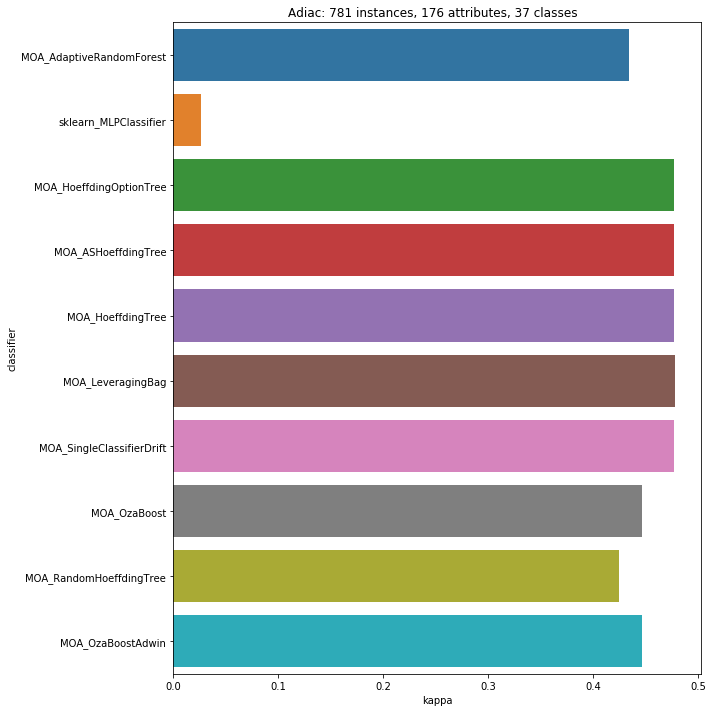

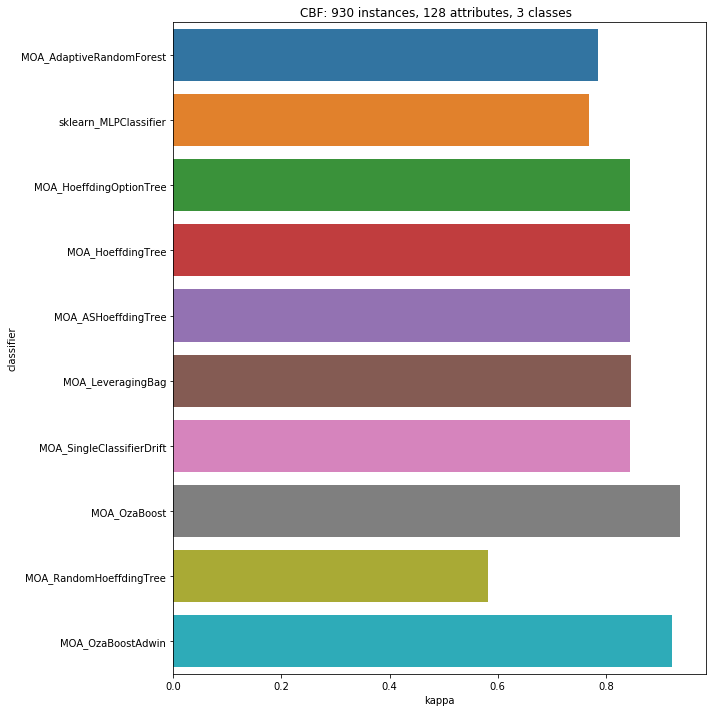

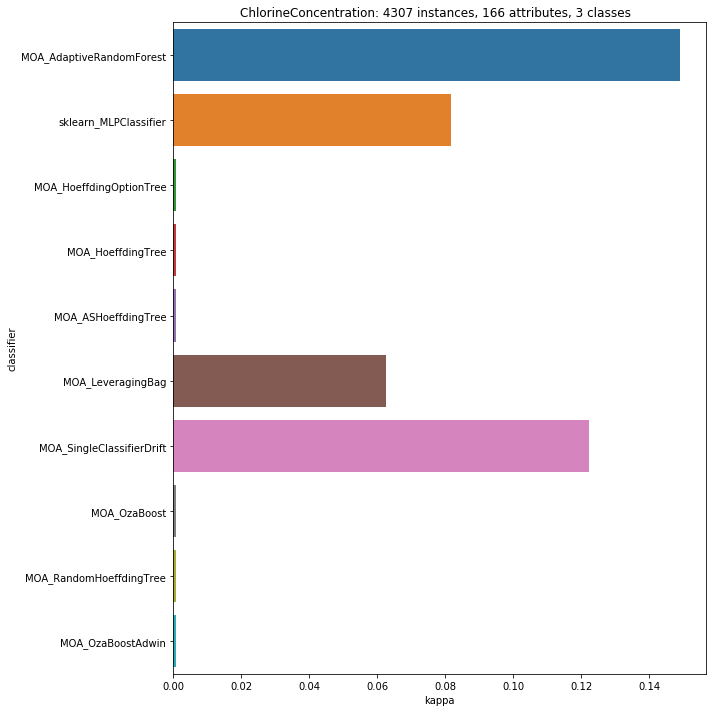

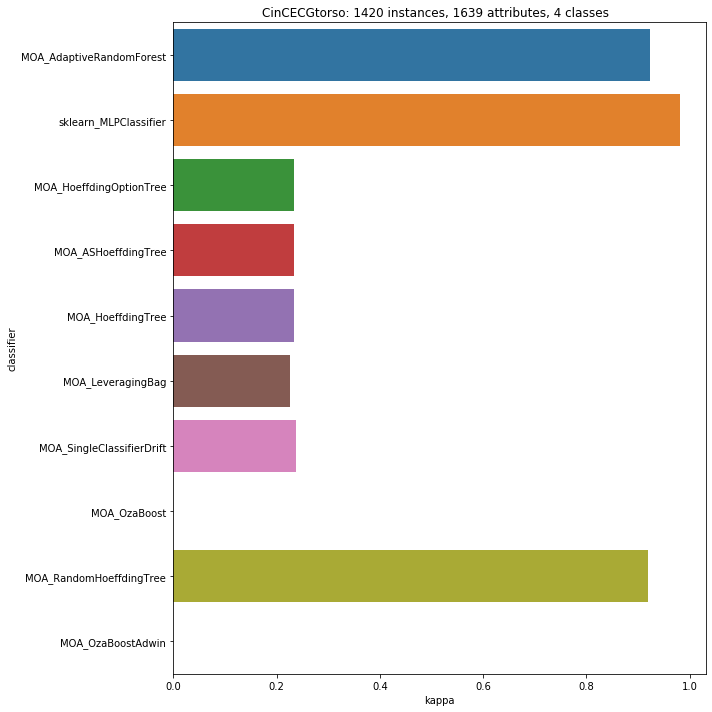

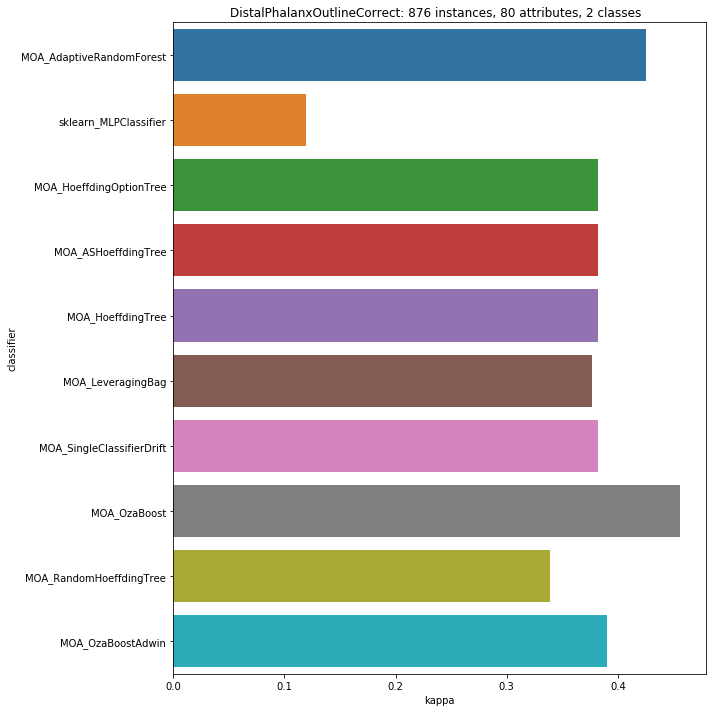

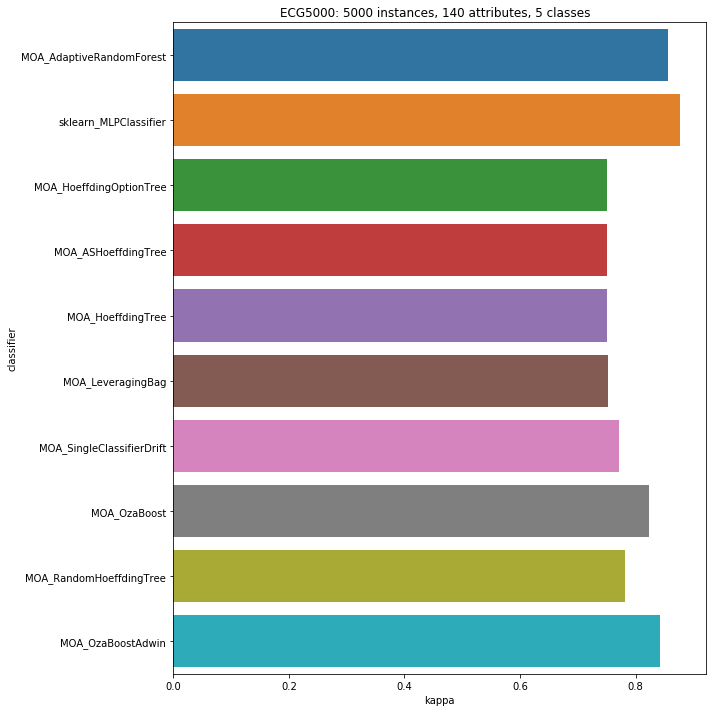

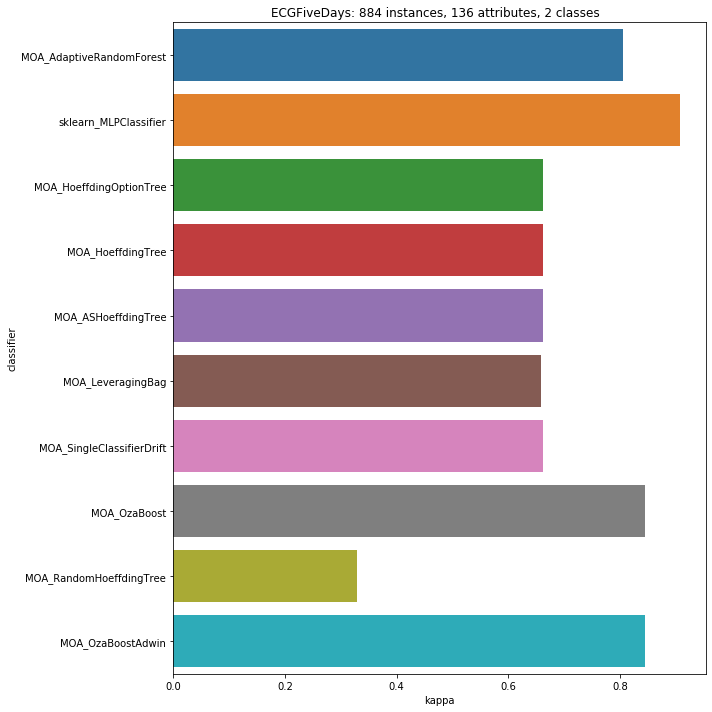

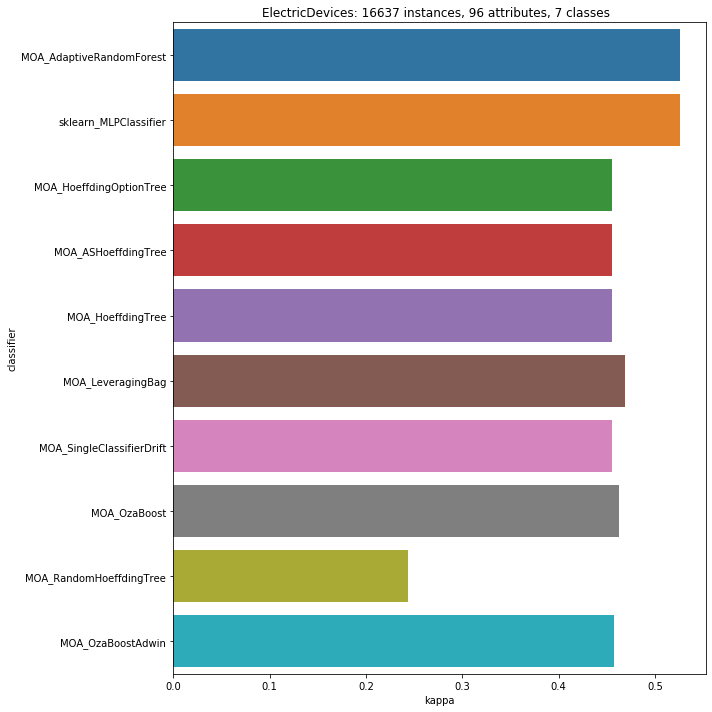

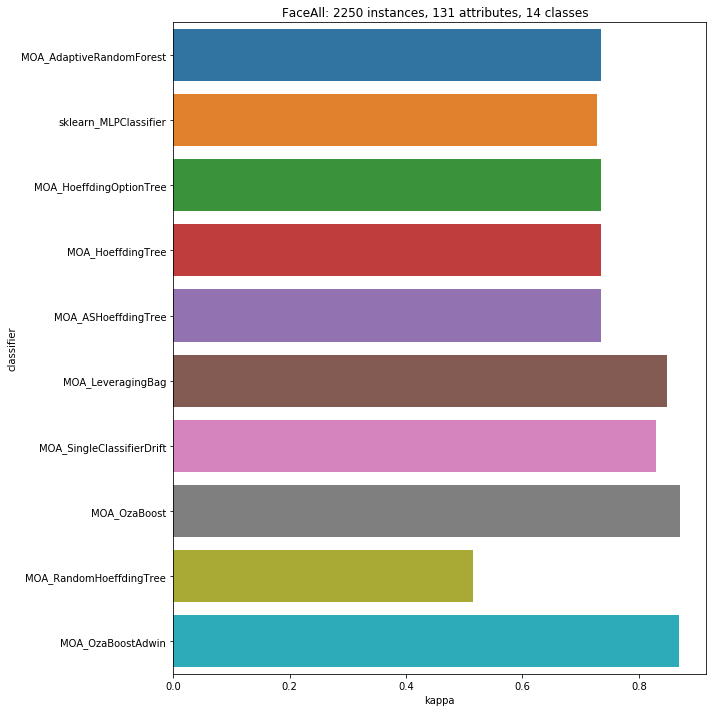

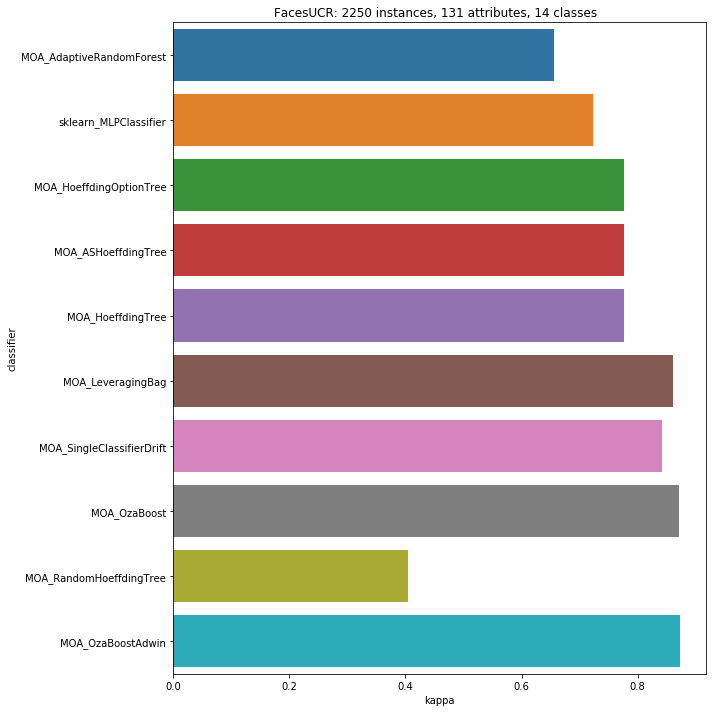

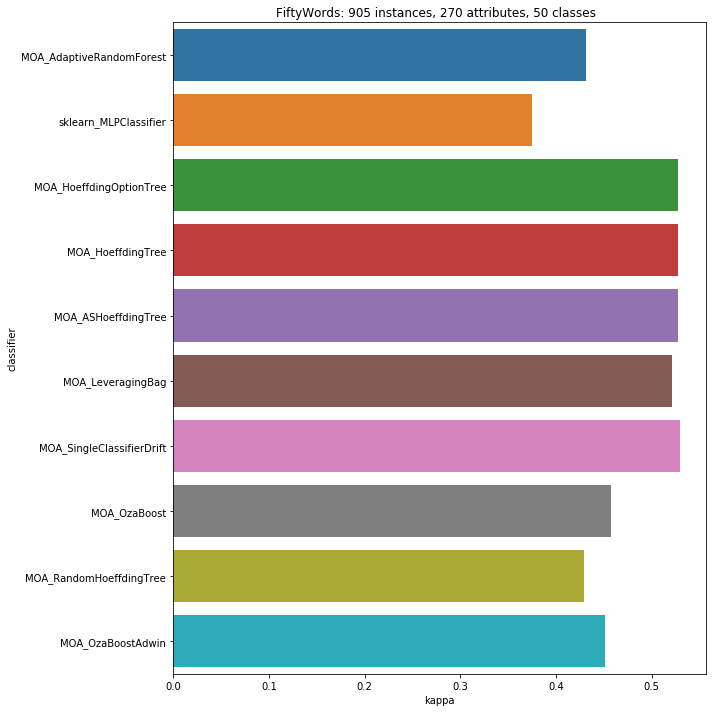

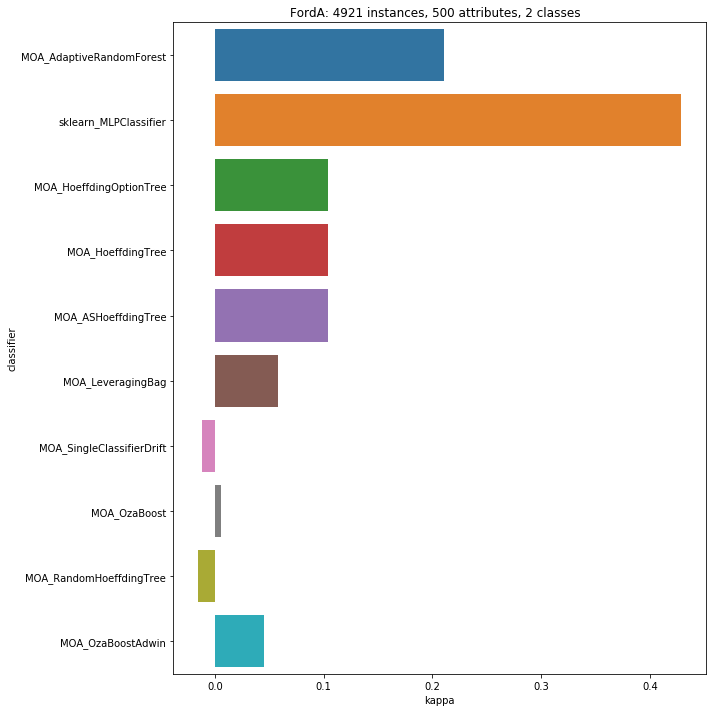

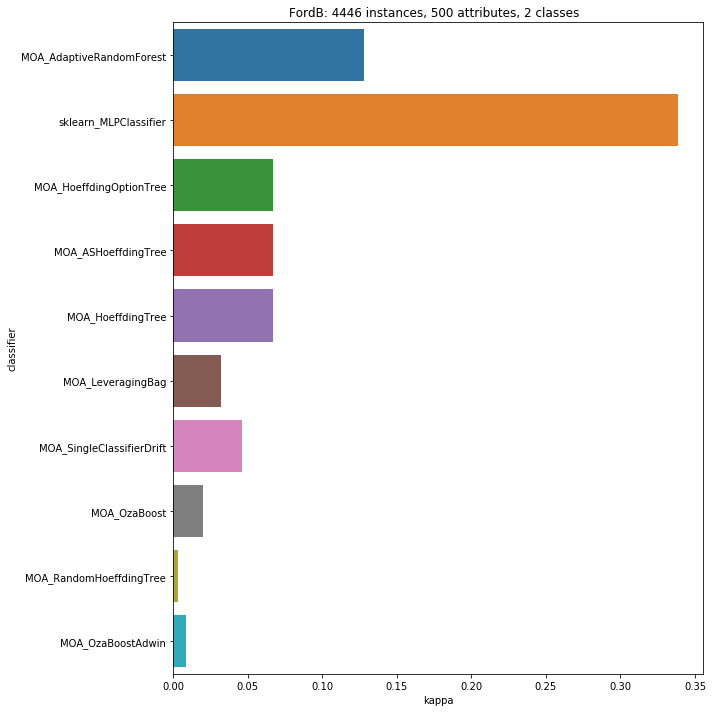

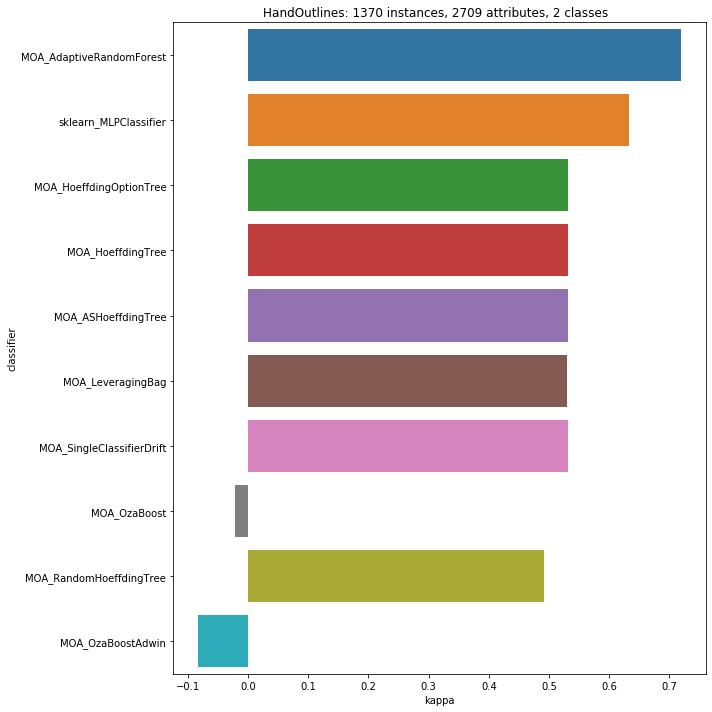

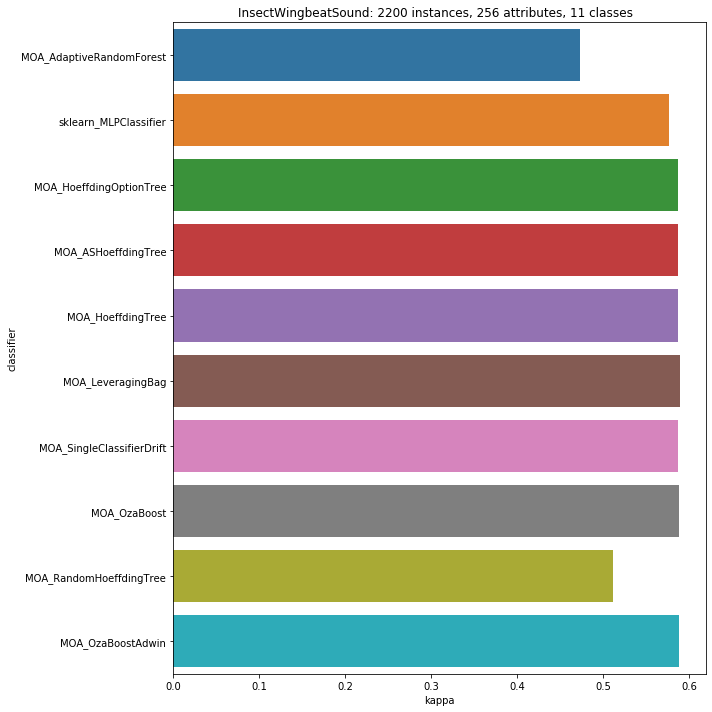

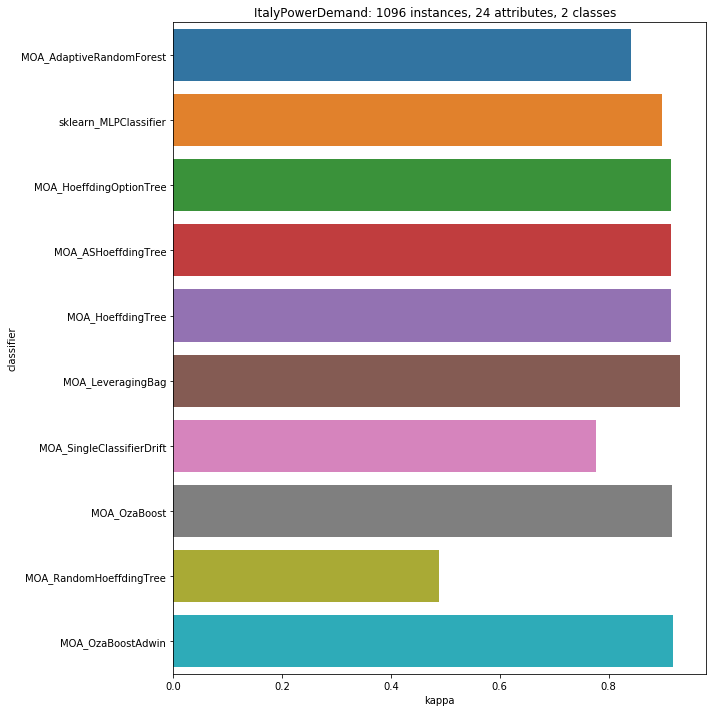

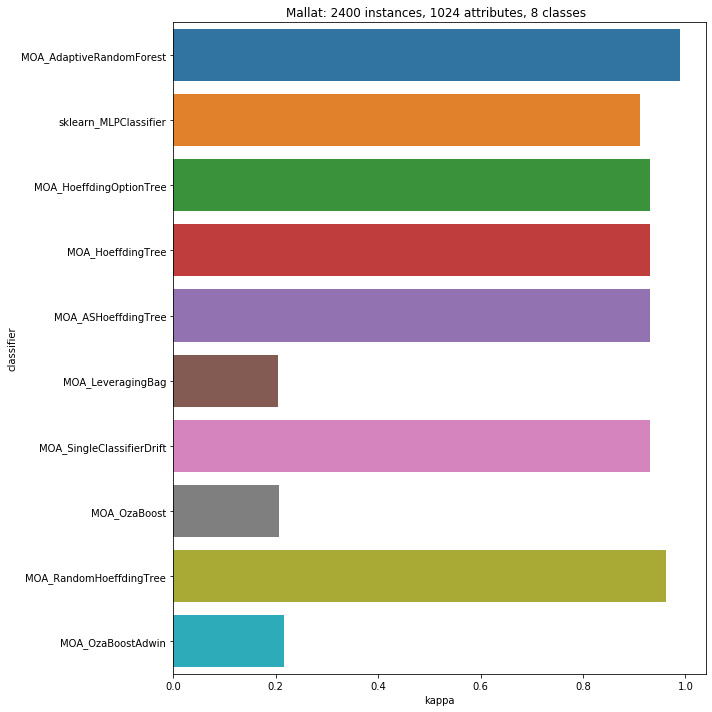

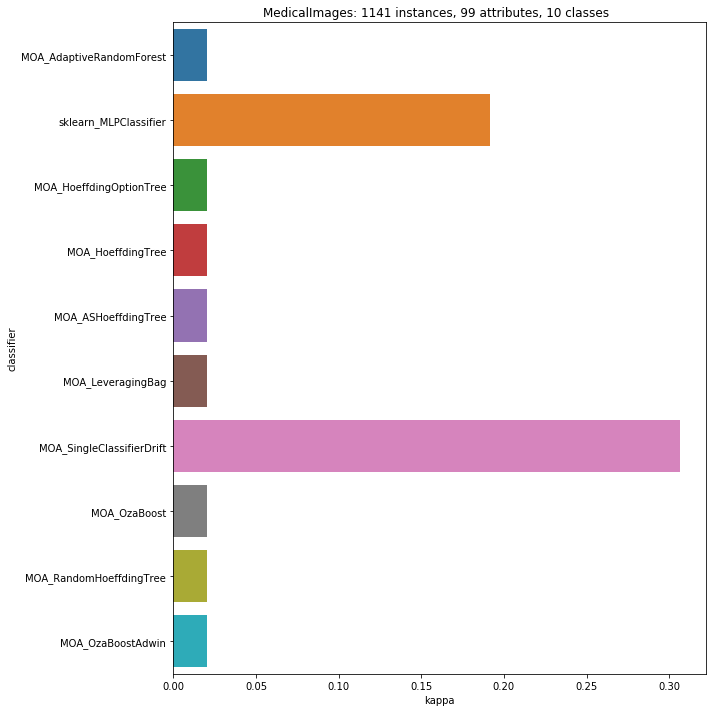

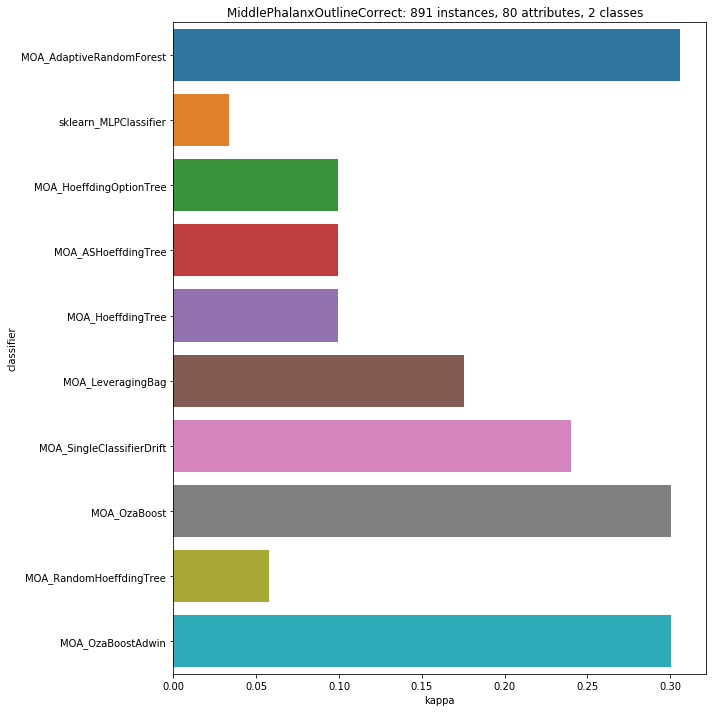

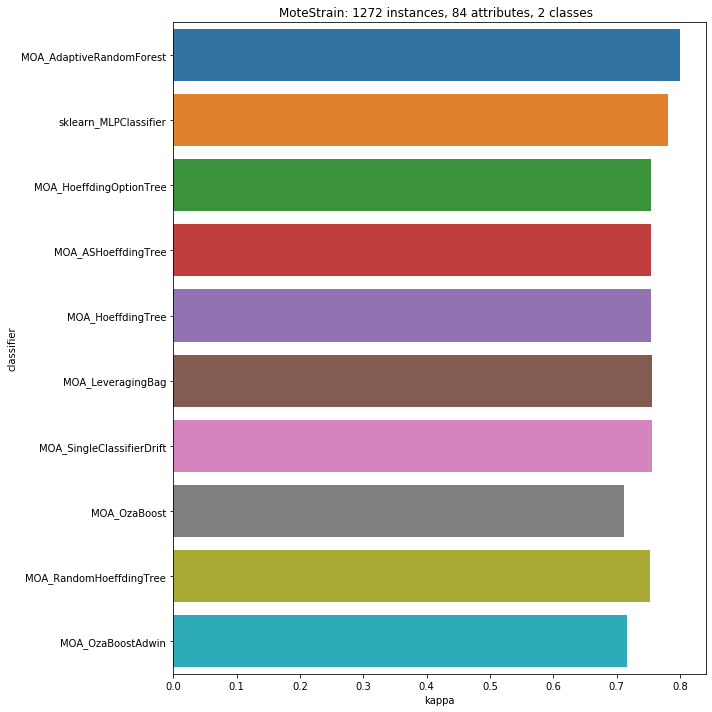

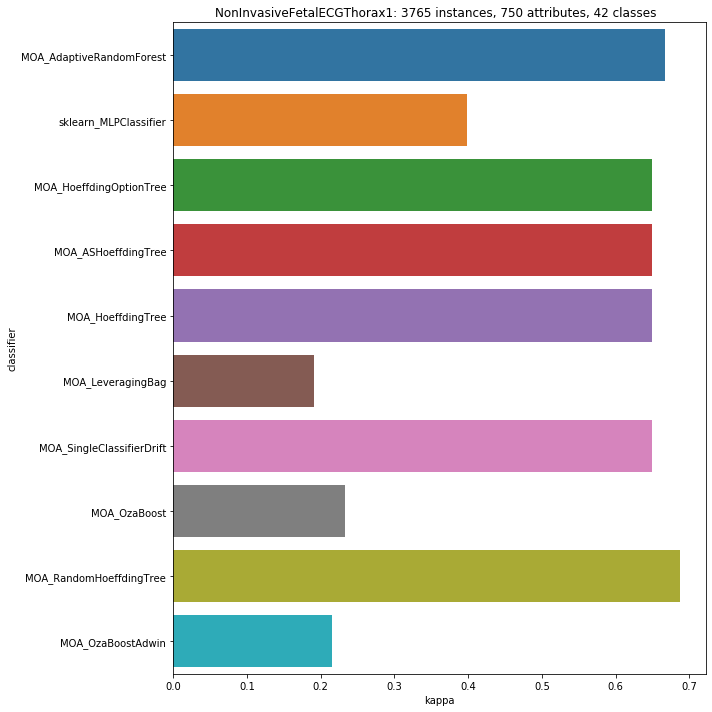

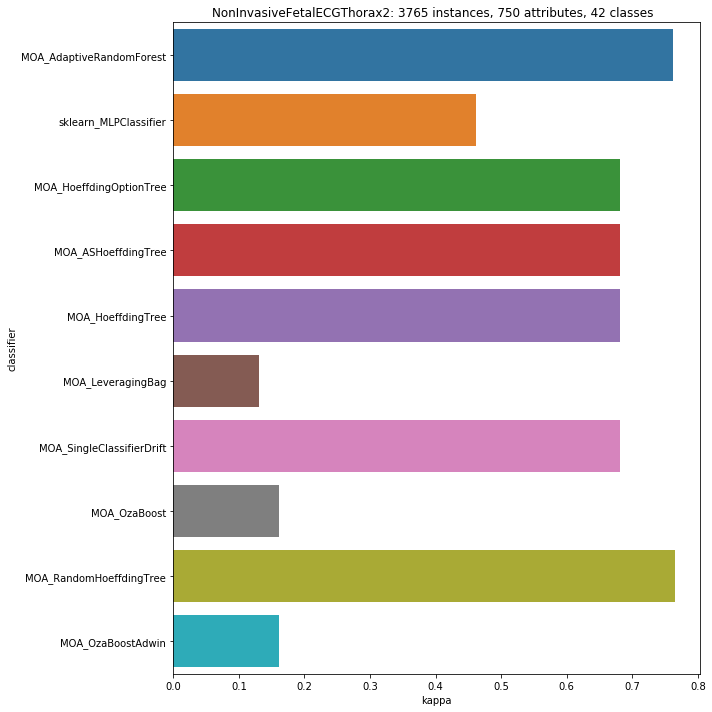

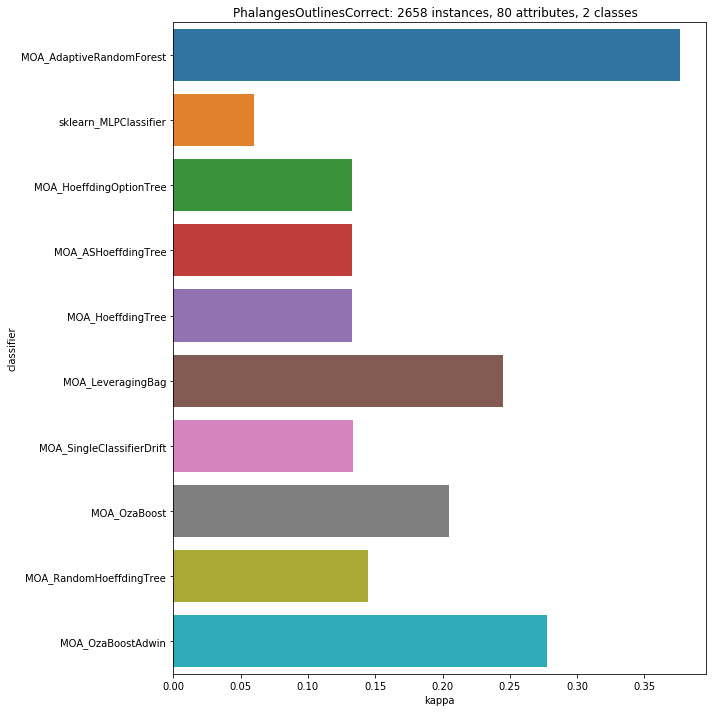

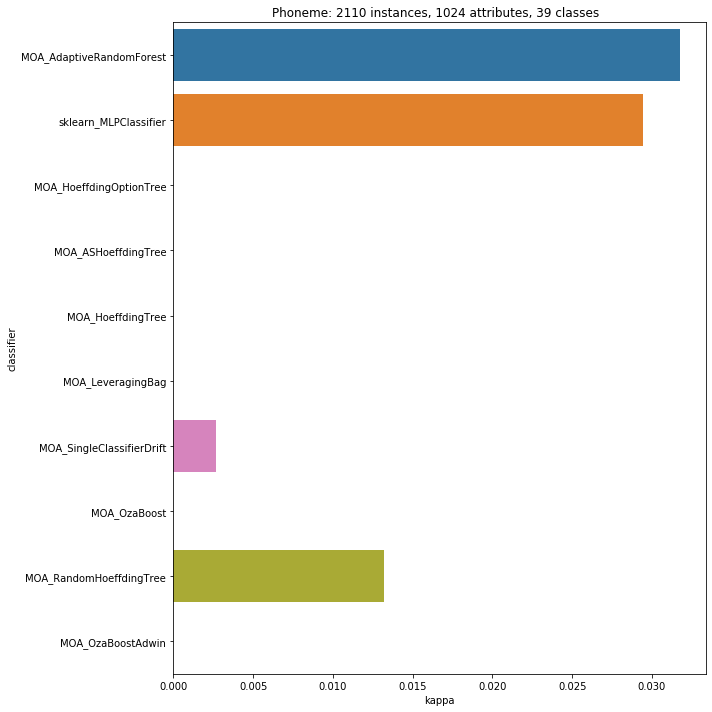

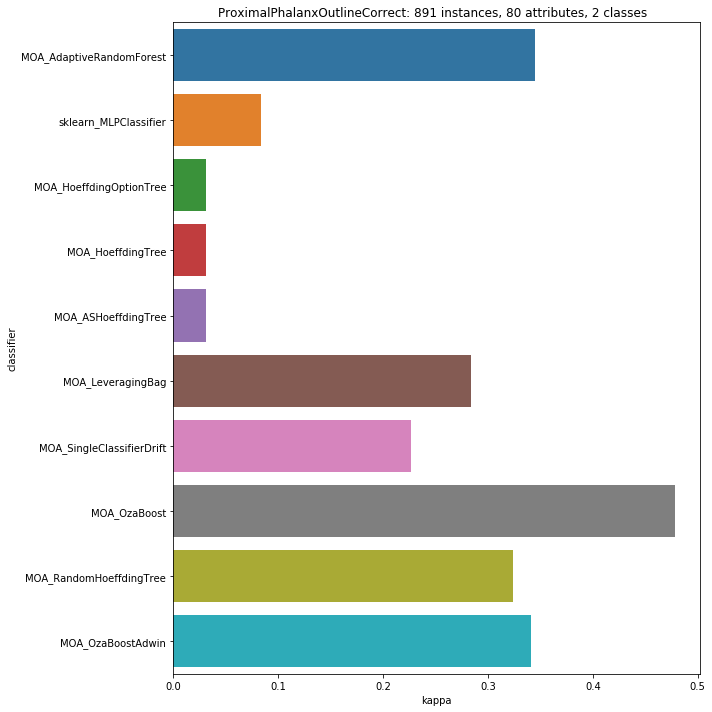

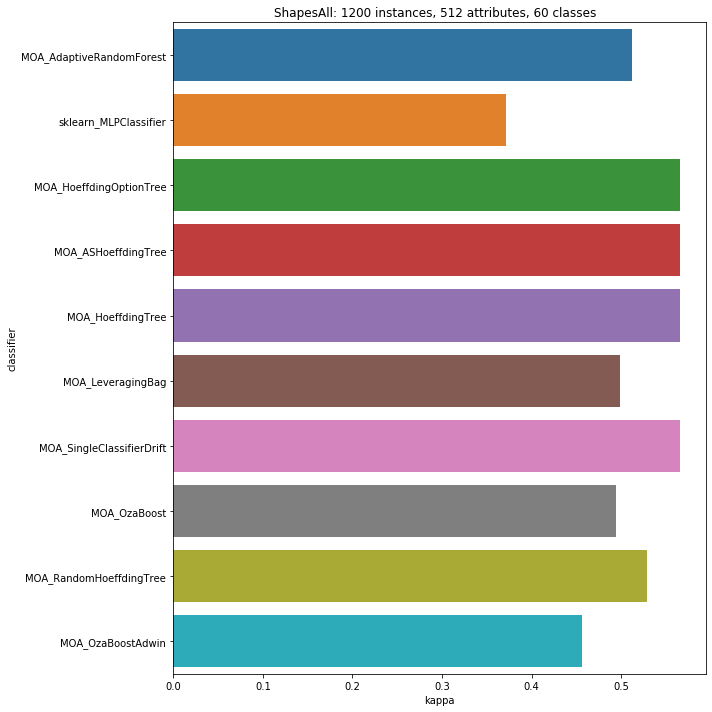

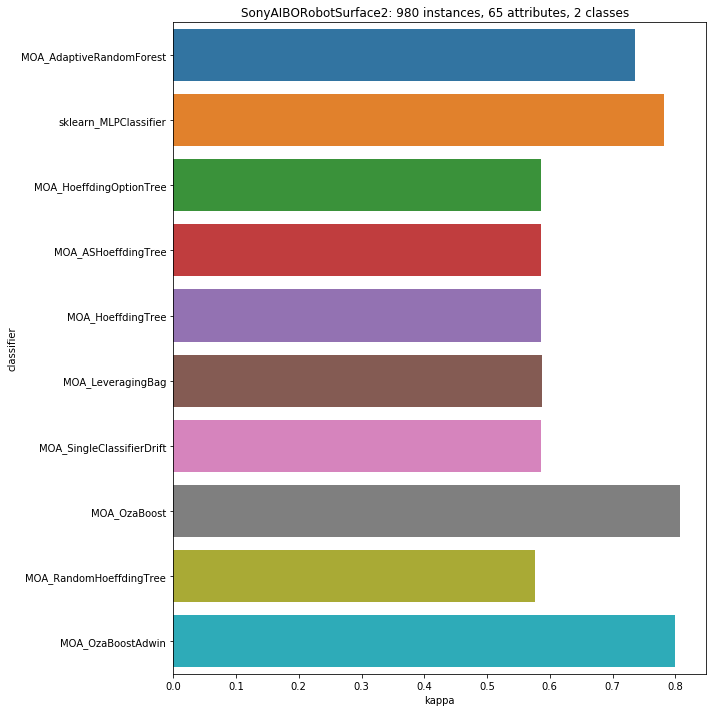

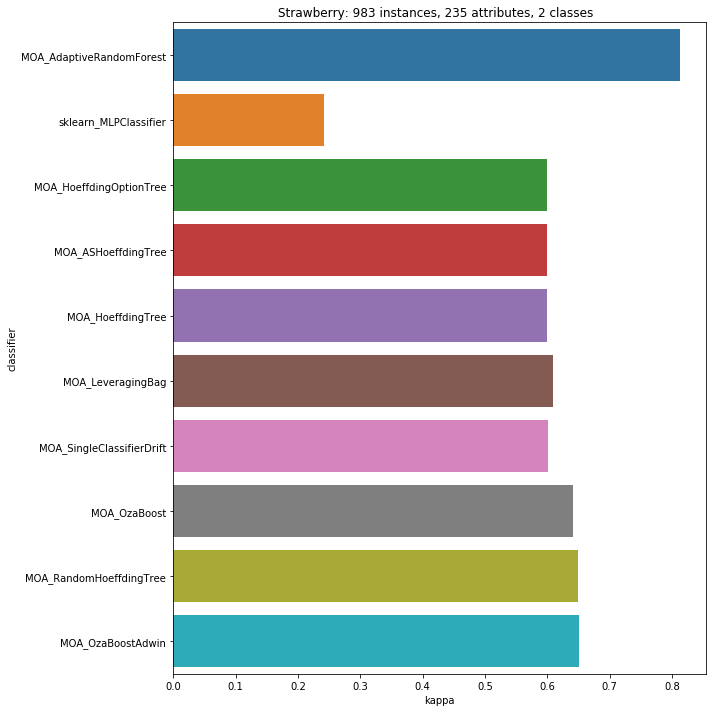

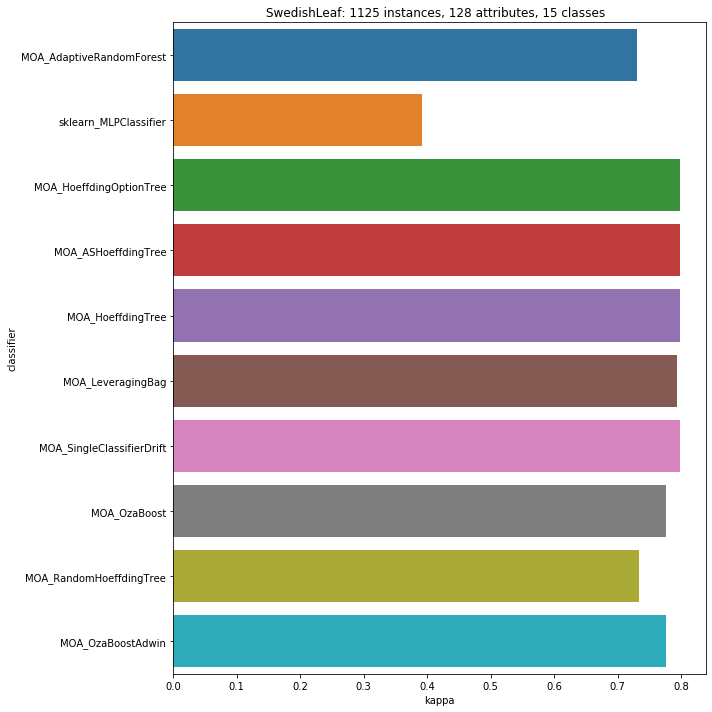

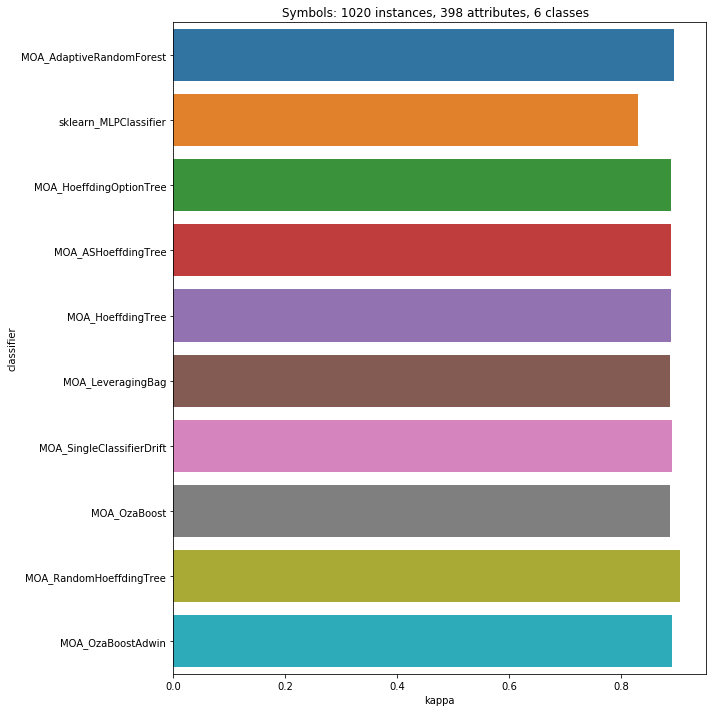

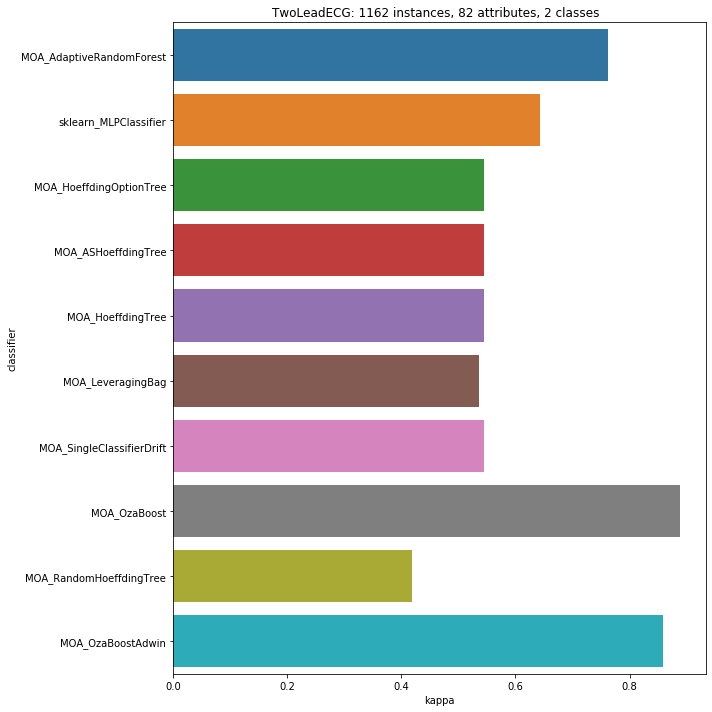

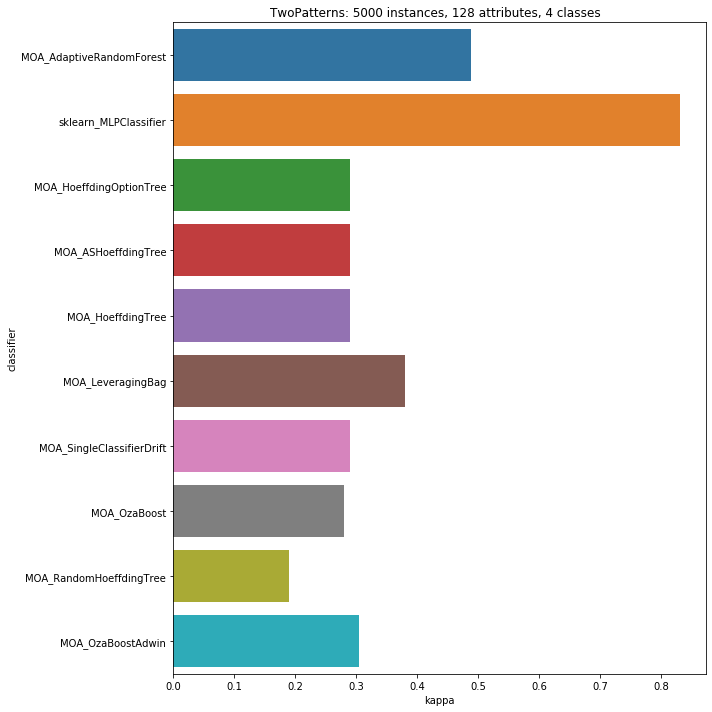

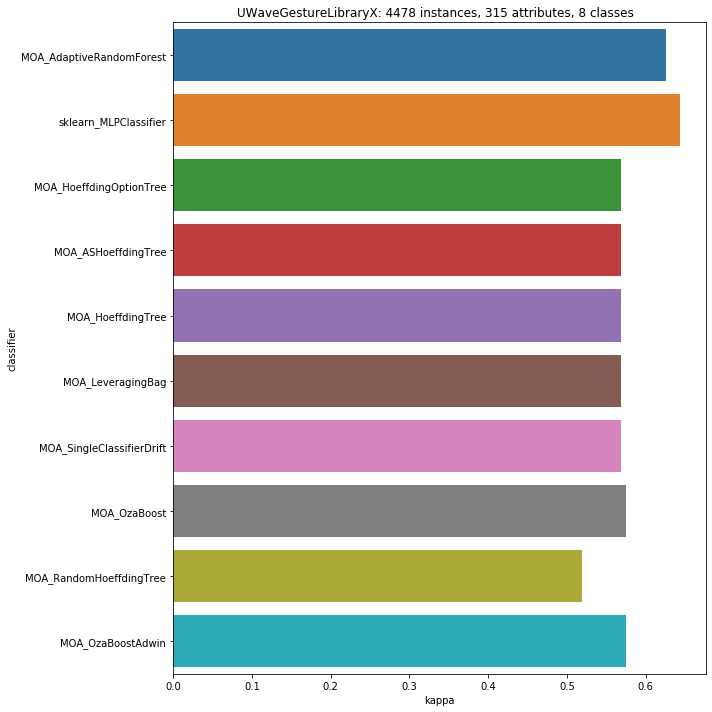

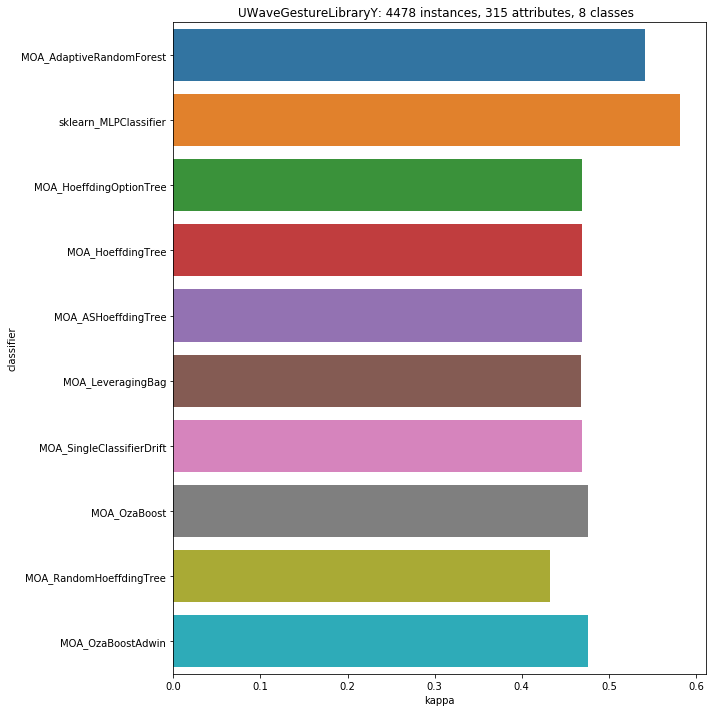

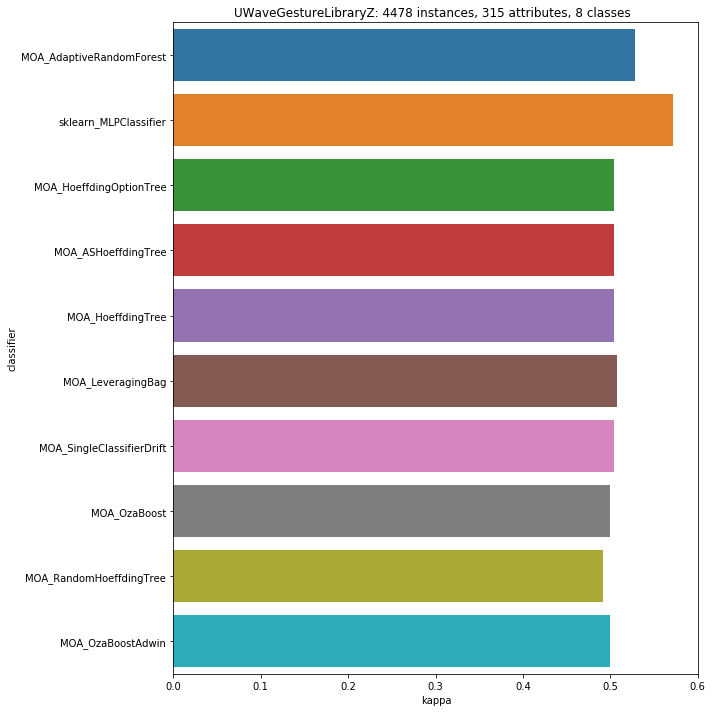

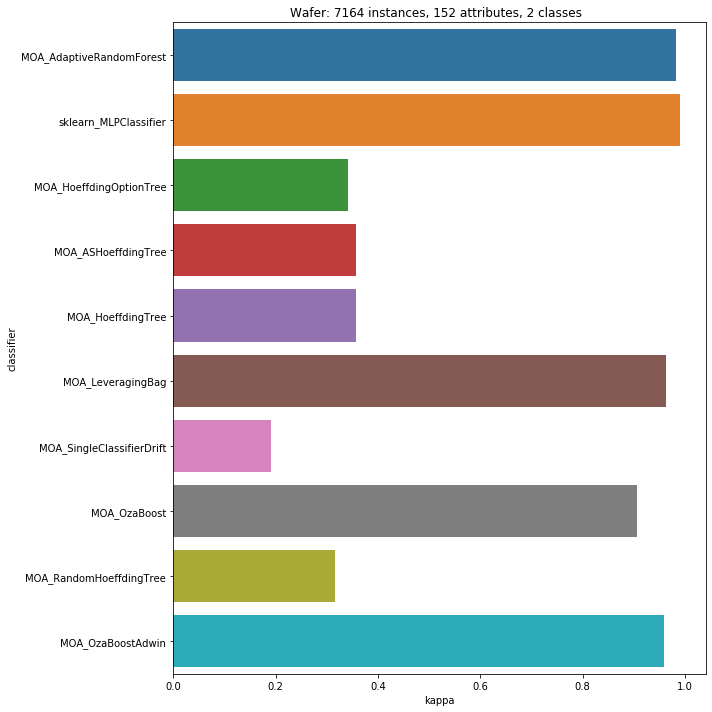

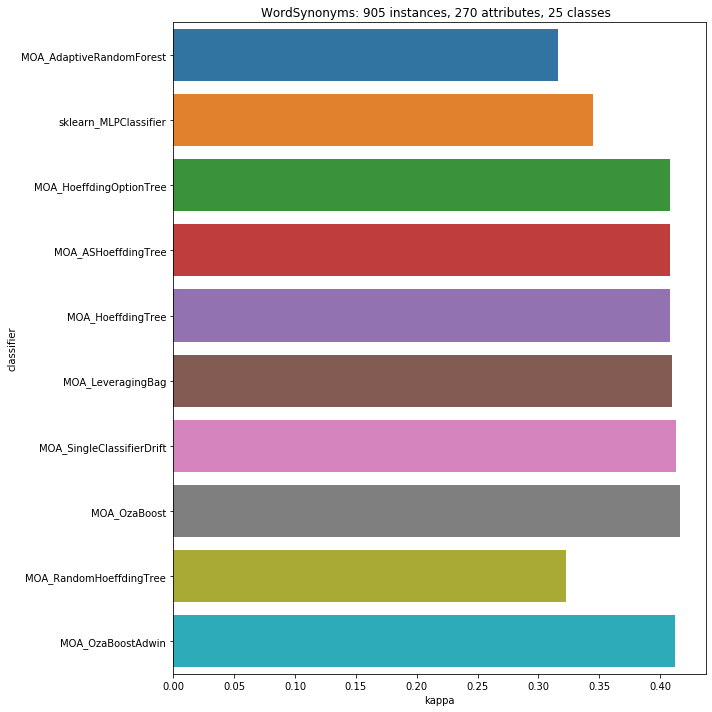

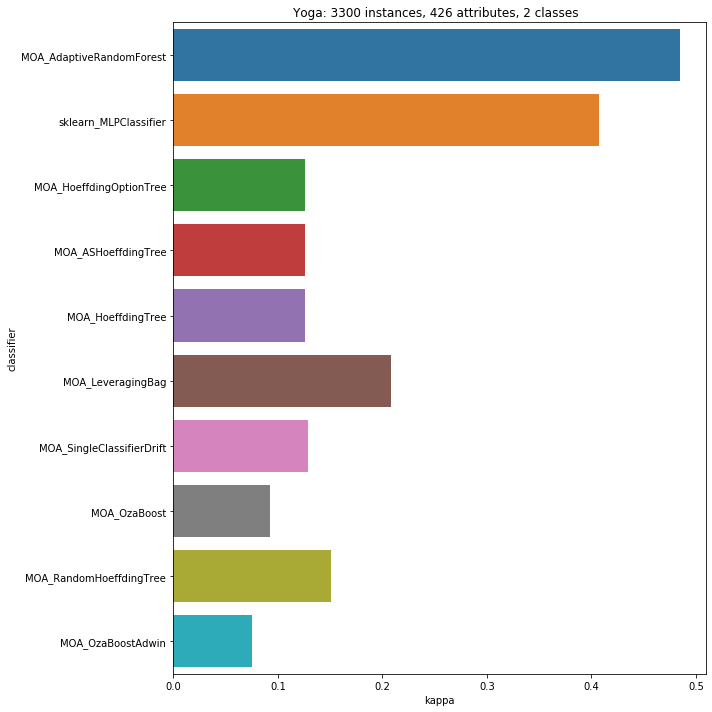

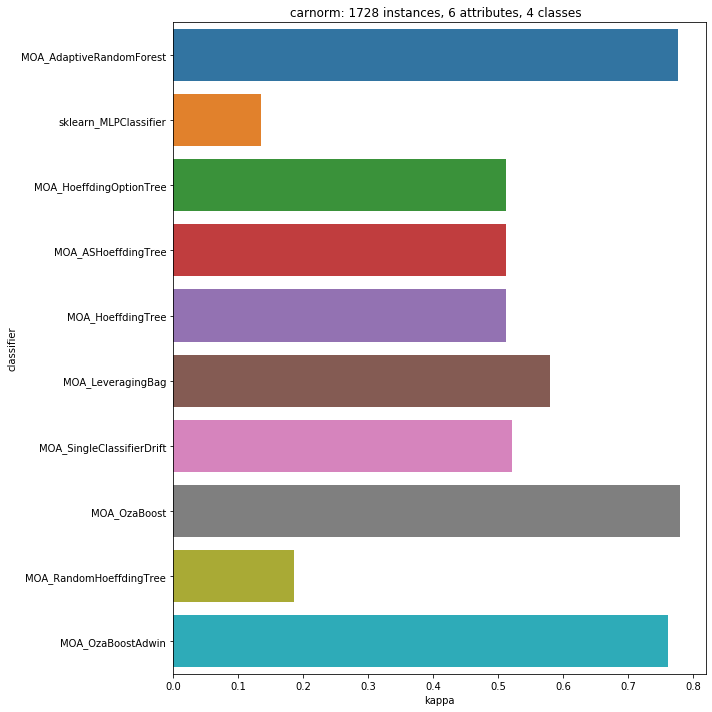

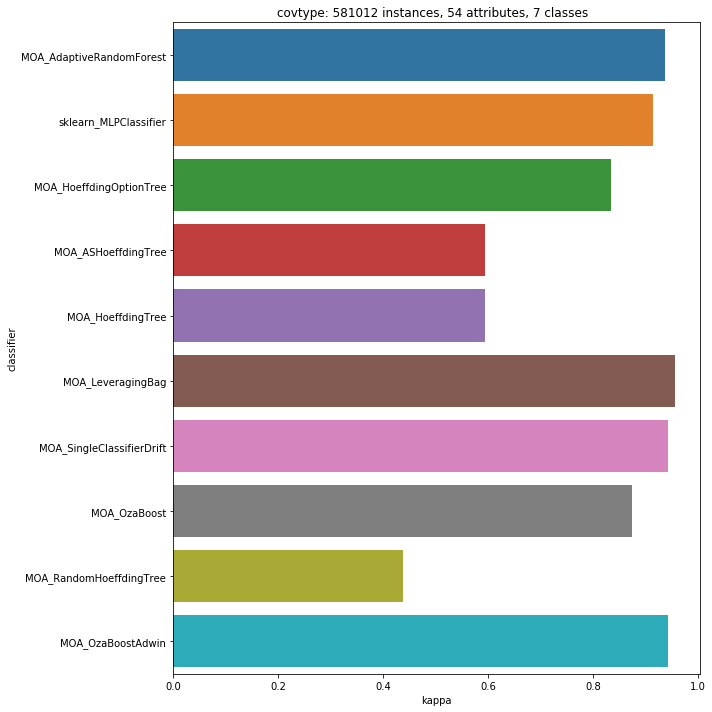

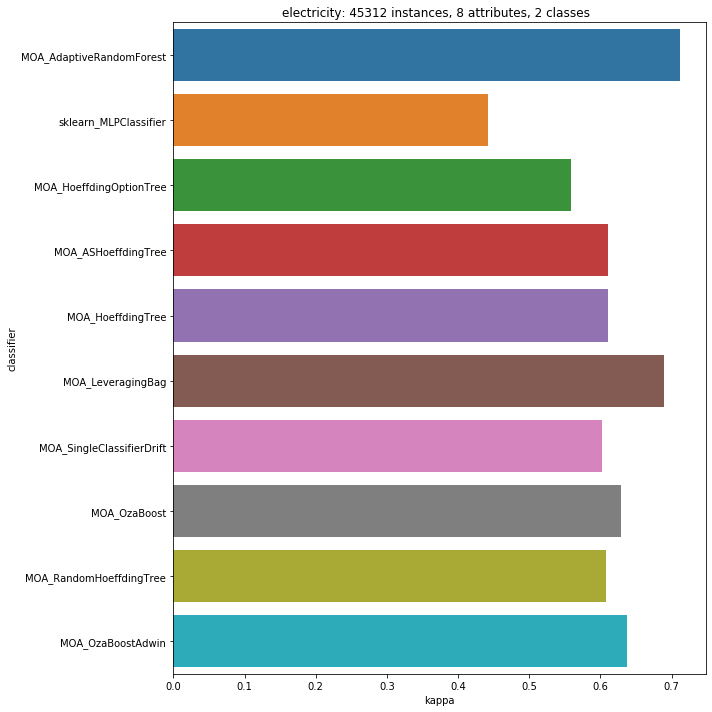

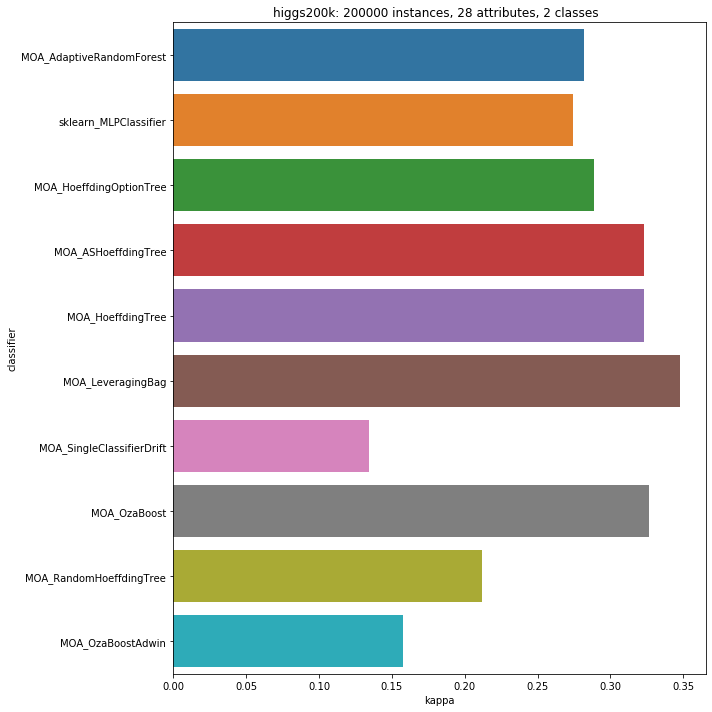

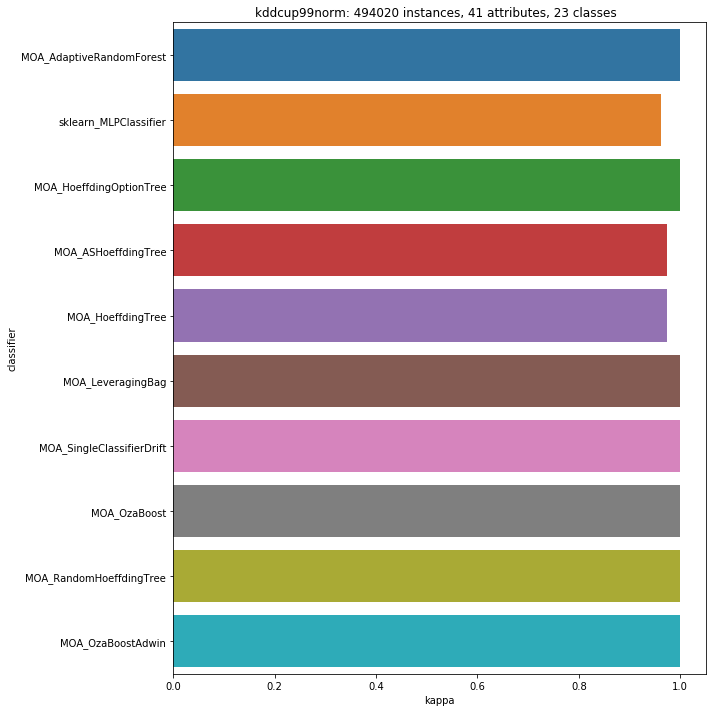

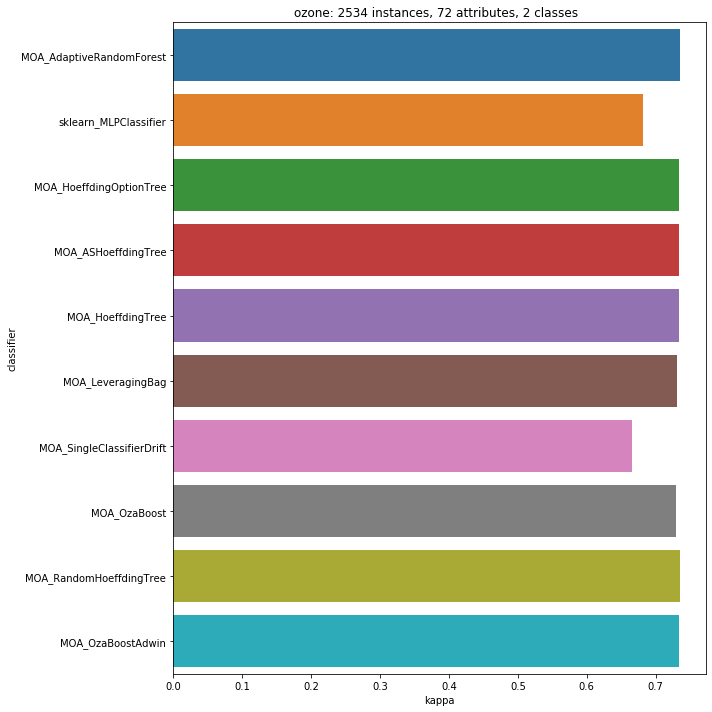

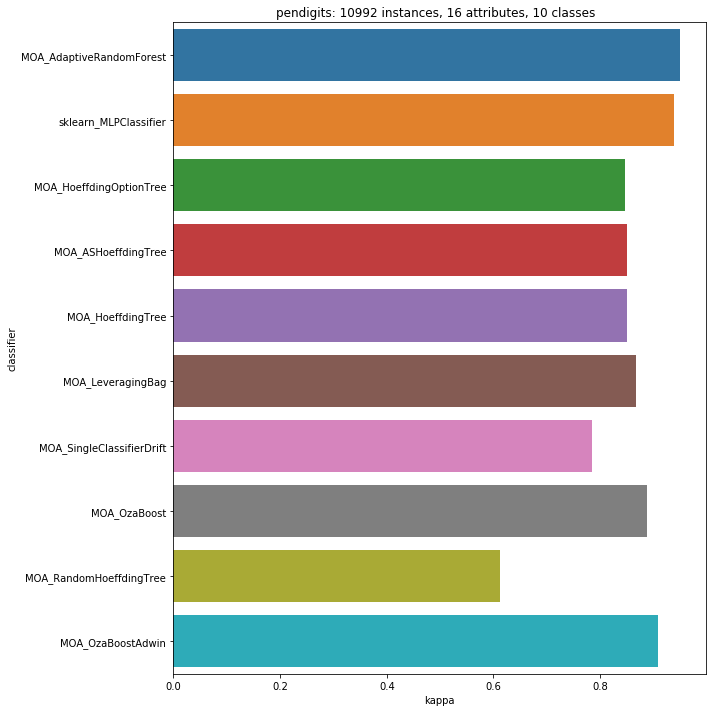

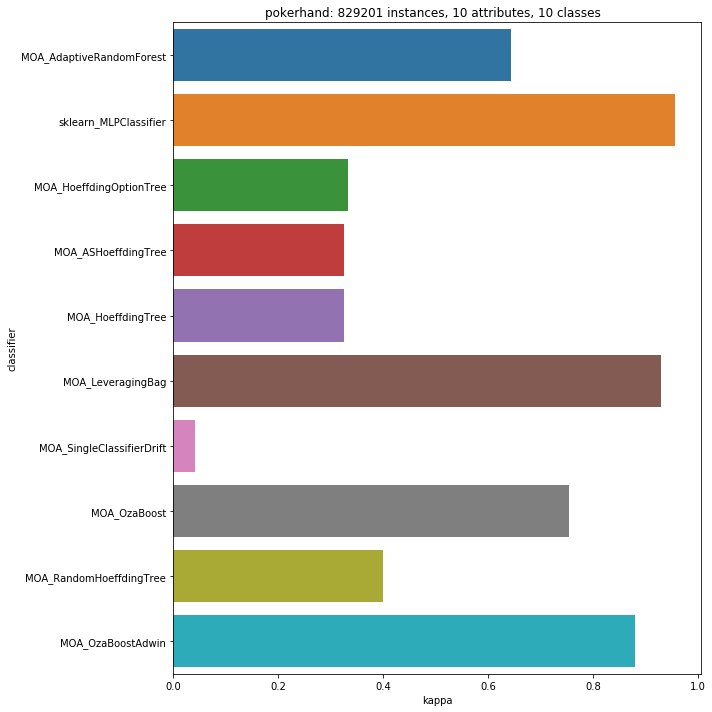

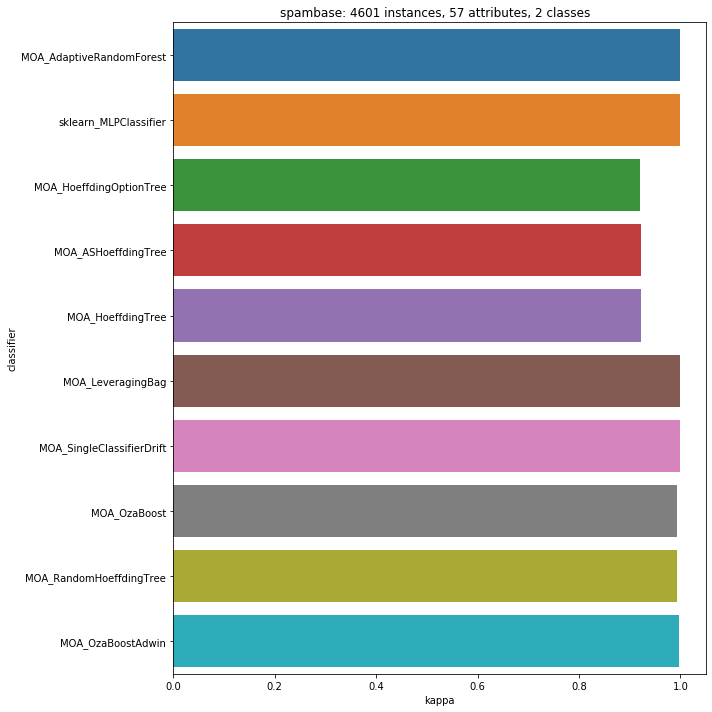

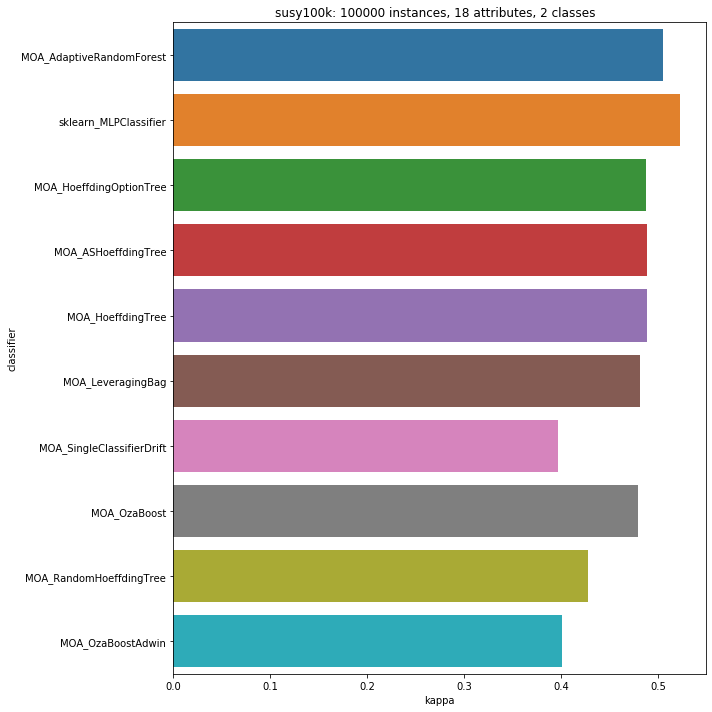

In [24]:
pdf_img_ls_top = []
for dataset in sorted(datasets):
    fig, ax = plt.subplots(1,figsize=(10,10))
    sns.barplot(ax=ax, data=metrics_top[['classifier', 'dataset', 'kappa']][metrics_top['dataset']==dataset], x='kappa', y='classifier', orient='h')
    inst = str(metrics_top[(metrics_top.dataset == dataset)].instances.values[0])
    attr = str(metrics_top[(metrics_top.dataset == dataset)].attributes.values[0])
    cl = str(metrics_top[(metrics_top.dataset == dataset)].classes.values[0])
    ax.set_title("{}: {} instances, {} attributes, {} classes  ".format(dataset, inst, attr, cl))
    fig.tight_layout()
    ax.get_figure().savefig(directory+dataset+'-top.png')
    pdf_img_ls_top.append(directory+dataset+'-top.png')
    plt.show()

In [16]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls_top]
pdf_filename = directory+"datasets-top_classifier-"+_METRIC+'.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []

## Save plots as pdf

In [17]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = directory+_METRIC+'_prop.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []

IndexError: list index out of range